# Reinforcement Learning for Trading

Author: Elkin Narváez Paz

* Email: elkinnarvaez2406@gmail.com
* LinkedIn: https://www.linkedin.com/in/elkinnarvaez/
* GitHub: https://github.com/elkinnarvaez

© All rights reserved.

## Libraries

In [168]:
import http.client
import requests
import json
import datetime
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## Constituents selection

In [169]:
constituents = pd.read_csv('data/constituents.csv')
constituents = constituents.drop(['SEC filings'], axis=1) #.rename(columns = {'Security': 'Constituent'})
constituents_by_sector = {}
for index, row in constituents.iterrows():
    if(row['GICS Sector'] in constituents_by_sector):
        constituents_by_sector[row['GICS Sector']].append(row)
    else:
        constituents_by_sector[row['GICS Sector']] = list(); constituents_by_sector[row['GICS Sector']].append(row)
for sector in constituents_by_sector:
    constituents_by_sector[sector] = pd.DataFrame(constituents_by_sector[sector])

### Sector breakdown

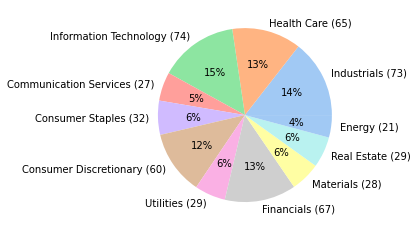

In [170]:
number_of_constituents_by_sector = list()
sectors = list()
for sector in constituents_by_sector:
    sectors.append(sector + ' (' + str(constituents_by_sector[sector].shape[0]) + ')')
    number_of_constituents_by_sector.append(constituents_by_sector[sector].shape[0])

colors = sns.color_palette('pastel')[0:len(sectors)]

plt.pie(number_of_constituents_by_sector, labels = sectors, colors = colors, autopct='%.0f%%')
plt.show()

### Stocks selection

In [171]:
def change_to_hypen(symbol):
    """
        Description: Change the dot character to hypen in the symbol. For instance, the symbol BF.B will be changed to BF-B.
    """
    new_symbol = ''
    for i in range(len(symbol)):
        if(symbol[i] == '.'):
            new_symbol += '-'
        else:
            new_symbol += symbol[i]
    return new_symbol

In [172]:
p = 0.2 # percentage of stocks that will be selected from each sector
constituent_symbols = list()
for sector in constituents_by_sector:
    sector_constituents = constituents_by_sector[sector]
    n = math.ceil(sector_constituents.shape[0]*p) # Number of stocks that will be selected from this sector
    constituents_already_selected = set()
    number_selections = 0
    random.seed(2018)
    while(number_selections < n):
        index = random.randint(0, sector_constituents.shape[0] - 1)
        if(index not in constituents_already_selected):
            constituent_symbols.append(change_to_hypen(sector_constituents.iloc[index]['Symbol']))
            constituents_already_selected.add(index)
            number_selections += 1
print(str(len(constituent_symbols)) + " constituents have been selected")
print(constituent_symbols)

105 constituents have been selected
['URI', 'DOV', 'ALLE', 'PWR', 'TDG', 'LHX', 'DAL', 'ROK', 'WAB', 'HWM', 'AAL', 'AME', 'CARR', 'UPS', 'SNA', 'CTLT', 'A', 'REGN', 'ZTS', 'JNJ', 'CAH', 'TFX', 'HSIC', 'ALGN', 'ABC', 'BAX', 'UHS', 'ABMD', 'TRMB', 'CDAY', 'AKAM', 'NXPI', 'SNPS', 'JNPR', 'CDW', 'PYPL', 'VRSN', 'GPN', 'AMD', 'APH', 'AAPL', 'TXN', 'QCOM', 'FB', 'CHTR', 'ATVI', 'FOX', 'NWS', 'OMC', 'CAG', 'MO', 'PM', 'LW', 'CL', 'SJM', 'K', 'MHK', 'CZR', 'AMZN', 'HLT', 'PENN', 'PHM', 'MCD', 'EXPE', 'BWA', 'LVS', 'NWL', 'DLTR', 'EXC', 'AWK', 'AES', 'DUK', 'NI', 'NRG', 'CB', 'AXP', 'PGR', 'WFC', 'L', 'SCHW', 'SPGI', 'GS', 'AMP', 'AON', 'WRB', 'SIVB', 'ALL', 'BLK', 'LYB', 'BLL', 'APD', 'FMC', 'NEM', 'NUE', 'MAA', 'CBRE', 'ARE', 'FRT', 'O', 'REG', 'PXD', 'CTRA', 'APA', 'MRO', 'WMB']


## Data gathering

### Data gathering: Retrieve using YH Finance API

In [73]:
conn = http.client.HTTPSConnection("yh-finance.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "yh-finance.p.rapidapi.com",
    'x-rapidapi-key': "fc1708951fmshca8b1e8a9e96604p126192jsnf88ca47a0efd"
    }

In [74]:
indicators = {}
progress = 0
for symbol in constituent_symbols:
    print(f"Progress: {math.floor((progress*100)/len(constituent_symbols))}%")
    conn.request("GET", f"/stock/v3/get-chart?interval=60m&symbol={symbol}&range=2y&region=US&includePrePost=false&useYfid=true&includeAdjustedClose=true&events=capitalGain%2Cdiv%2Csplit", headers=headers)
    res = conn.getresponse()
    data = res.read()

    result = json.loads(data.decode("utf-8"))["chart"]["result"][0]

    indicators[symbol] = {
        "timestamp": list(map(lambda x: datetime.datetime.fromtimestamp(x), result["timestamp"])),
        "high": result["indicators"]["quote"][0]["high"],
        "volume": result["indicators"]["quote"][0]["volume"],
        "open": result["indicators"]["quote"][0]["open"],
        "low": result["indicators"]["quote"][0]["low"],
        "close": result["indicators"]["quote"][0]["close"]
    }
    progress += 1

Progress: 0%
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 48%
Progress: 49%
Progress: 50%
Progress: 51%
Progress: 52%
Progress: 53%
Progress: 54%
Progress: 55%
Progress: 56%
Progress: 57%
Progress: 58%
Progress: 59%
Progress: 60%
Progress: 60%


KeyError: 'chart'

In [ ]:
dfs = {}
for symbol in constituent_symbols:
    dfs[symbol] = pd.DataFrame(indicators[symbol])

### Data gathering: Store in Local Storage

In [70]:
progress = 0
for symbol in constituent_symbols:
    print(f"Progress: {math.floor((progress*100)/len(constituent_symbols))}%")
    f = open(f"data/stocks/{symbol}.csv", "w")
    f.write(dfs[symbol].to_csv(index=False))
    f.close()
    progress += 1
print(f"Progress: {100}%")

Progress: 0%
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 48%
Progress: 49%
Progress: 50%
Progress: 51%
Progress: 52%
Progress: 53%
Progress: 54%
Progress: 55%
Progress: 56%
Progress: 57%
Progress: 58%
Progress: 59%
Progress: 60%
Progress: 60%
Progress: 61%
Progress: 62%
Progress: 63%
Progress: 64%
Progress: 65%
Progress: 66%
Progress: 67%
Pro

### Data gathering: Retrieve from Local Storage

In [173]:
dfs = {}
progress = 0
for symbol in constituent_symbols:
    print(f"Progress: {math.floor((progress*100)/len(constituent_symbols))}%")
    dfs[symbol] = pd.read_csv(f"data/stocks/{symbol}.csv")
    progress += 1
print(f"Progress: {100}%")

Progress: 0%
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 48%
Progress: 49%
Progress: 50%
Progress: 51%
Progress: 52%
Progress: 53%
Progress: 54%
Progress: 55%
Progress: 56%
Progress: 57%
Progress: 58%
Progress: 59%
Progress: 60%
Progress: 60%
Progress: 61%
Progress: 62%
Progress: 63%
Progress: 64%
Progress: 65%
Progress: 66%
Progress: 67%
Pro

## Trading signal functions

### Simple Moving Average (SMA)

In [174]:
def SMA(num_periods, close_prices):
    """
        Input:
            - num_periods: number of time periods over which to average -> int
            - close_prices: a Series object containing the close prices over which to calculate the SMA values -> pandas.core.series.Series
        Output:
            SMA values
    """
    sma_values = []
    
    history = [] # history of prices
    for close_price in close_prices:
        history.append(close_price)
        if(len(history) > num_periods): # remove the oldest price because we only average over the last 'numPeriods' prices
            del history[0]
        sma_values.append(stats.mean(history))
        
    return sma_values

### Exponential Moving Average (EMA)

In [175]:
def EMA(num_periods, close_prices):
    """
        Input:
            - num_periods: number of time periods over which to average -> int
            - close_prices: a Series object containing the close prices over which to calculate the EMA values -> pandas.core.series.Series
        Output:
            EMA values
    """
    ema_values = []
    
    K = 2 / (num_periods + 1) # smoothing constant
    ema = 0
    
    for close_price in close_prices:
        if(ema == 0):
            ema = close_price
        else:
            ema = (close_price - ema) * K + ema
        ema_values.append(ema)
    
    return ema_values

### Absolute Price Oscillator (APO)

In [176]:
def APO(num_periods_fast, num_periods_slow, close_prices):
    """
        Input:
            - num_periods_fast: number of time periods for the fast EMA -> int
            - num_periods_slow: number of time periods for the slow EMA -> int
            - close_prices: a Series object containing the close prices over which to calculate the APO values -> pandas.core.series.Series
        Output:
            APO values
    """
    apo_values = []

    ema_fast = 0
    K_fast = 2 / (num_periods_fast + 1) # fast EMA smoothing factor
    ema_slow = 0
    K_slow = 2 / (num_periods_slow + 1) # slow EMA smoothing factor
    
    for close_price in close_prices:
        if(ema_fast == 0): # First observation
            ema_fast = close_price
            ema_slow = close_price
        else:
            ema_fast = (close_price - ema_fast) * K_fast + ema_fast
            ema_slow = (close_price - ema_slow) * K_slow + ema_slow
        apo_values.append(ema_fast - ema_slow)
        
    return apo_values

### Moving Average Convergence Divergence (MACD)

In [177]:
def MACD(num_periods_fast, num_periods_slow, num_periods_macd, close_prices):
    """
        Input:
            - num_periods_fast: number of time periods for the fast EMA -> int
            - num_periods_slow: number of time periods for the slow EMA -> int
            - num_periods_macd: number of time periods for the MACD EMA -> int
            - close_prices: a Series object containing the close prices over which to calculate the MACD values -> pandas.core.series.Series
        Output:
            MACD values
    """
    macdSignalValues = []
    macdHistogramValues = []

    emaFast = 0
    Kfast = 2 / (numPeriodsFast + 1) # fast EMA smoothing factor
    emaSlow = 0
    Kslow = 2 / (numPeriodsSlow + 1) # slow EMA smoothing factor
    emaMacd = 0
    Kmacd = 2 / (numPeriodsMacd + 1) # MACD EMA smoothing factor
    
    for closePrice in indicators[symbol]['close']:
        if(emaFast == 0): # First observation
            emaFast = closePrice
            emaSlow = closePrice
        else:
            emaFast = (closePrice - emaFast) * Kfast + emaFast
            emaSlow = (closePrice - emaSlow) * Kslow + emaSlow
        
        macd = emFast - emaSlow
        if(emaMacd == 0):
            emaMacd = macd
        else:
            emaMacd = (macd - emaMacd) * Kmacd + emaMacd
        
        macdSignalValues.append(emaMacd)
        macdHistogramValues.append(macd - emaMacd)
        
    return macdSignalValues, macdHistogramValues

## Data understanding

URI
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  106.769997  831187.0  100.989998   99.500000   
1     2020-03-09 09:30:00  106.400002  502866.0  106.315002  101.870003   
2     2020-03-09 10:30:00  103.870003  391965.0  101.889999  101.205002   
3     2020-03-09 11:30:00  102.900002  291914.0  102.800003  100.500000   
4     2020-03-09 12:30:00  100.889999  378444.0  100.889999   98.120003   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  303.320007  109023.0  300.559998  299.549988   
3519  2022-03-07 13:30:00  302.679993  124846.0  301.940002  299.049988   
3520  2022-03-07 14:30:00  300.750000  138449.0  300.619995  295.500000   
3521  2022-03-07 15:30:00  299.170013  182128.0  298.429993  297.595001   
3522  2022-03-07 16:00:00  298.239990       0.0  298.239990  298.239990   

           close  
0     106.309998  
1     101.870003  
2     102.860001  
3     100.790001  


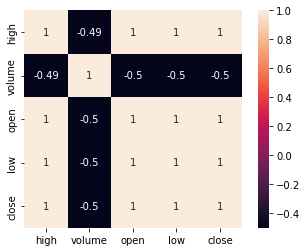




DOV
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   95.309998       0.0   93.910004   92.379997   
1     2020-03-09 09:30:00   95.160004  218518.0   94.925003   92.629997   
2     2020-03-09 10:30:00   95.290001  173948.0   93.940002   93.500000   
3     2020-03-09 11:30:00   94.040001  147097.0   93.989998   93.279999   
4     2020-03-09 12:30:00   93.669998  203285.0   93.519997   92.360001   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  148.649994  124625.0  148.050003  147.690002   
3519  2022-03-07 13:30:00  148.649994  126695.0  148.434998  147.559998   
3520  2022-03-07 14:30:00  148.520004  151096.0  148.389999  147.470001   
3521  2022-03-07 15:30:00  147.940002  244354.0  147.899994  146.669998   
3522  2022-03-07 16:00:00  146.860001       0.0  146.860001  146.860001   

           close  
0      94.830002  
1      94.059998  
2      93.989998  
3      93.599998

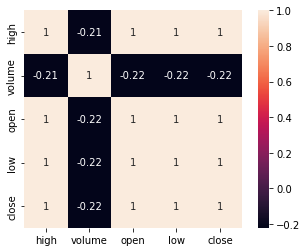




ALLE
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  118.639999       0.0  112.269997  102.120003   
1     2020-03-09 09:30:00  120.010002  256684.0  118.330002  115.970001   
2     2020-03-09 10:30:00  118.364998   65465.0  116.570000  116.279999   
3     2020-03-09 11:30:00  116.230003   86479.0  116.144997  115.264999   
4     2020-03-09 12:30:00  115.320000  103252.0  115.309998  113.839996   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  116.970001   86266.0  116.110001  115.930000   
3519  2022-03-07 13:30:00  116.489998   95240.0  116.345001  115.805000   
3520  2022-03-07 14:30:00  116.050003   89830.0  115.885002  115.150002   
3521  2022-03-07 15:30:00  115.750000  191217.0  115.739998  114.720001   
3522  2022-03-07 16:00:00  114.730003       0.0  114.730003  114.730003   

           close  
0     118.220001  
1     116.705002  
2     116.370003  
3     115.33000

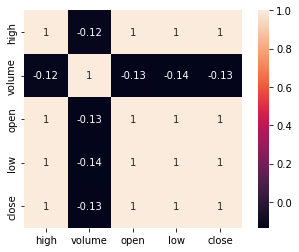




PWR
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   35.290001  337378.0   35.290001   34.080002   
1     2020-03-09 09:30:00   34.919998  469377.0   34.650002   34.279999   
2     2020-03-09 10:30:00   35.410000  285693.0   34.840000   34.820000   
3     2020-03-09 11:30:00   35.090000  293123.0   35.070000   34.480000   
4     2020-03-09 12:30:00   34.490002  257767.0   34.490002   33.869999   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  109.250000   99345.0  108.680000  108.150002   
3519  2022-03-07 13:30:00  109.330002  201222.0  108.989998  108.110001   
3520  2022-03-07 14:30:00  108.650002  138406.0  107.989998  107.779999   
3521  2022-03-07 15:30:00  108.540001  248156.0  108.540001  107.815002   
3522  2022-03-07 16:00:00  108.010002       0.0  108.010002  108.010002   

           close  
0      34.660000  
1      34.849998  
2      35.070000  
3      34.509998

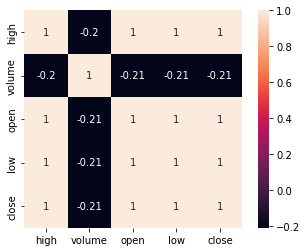




TDG
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  472.019989  252362.0  461.450012  451.010010   
1     2020-03-09 09:30:00  473.589996  222540.0  470.829987  458.049988   
2     2020-03-09 10:30:00  465.769989  118743.0  463.635010  455.750000   
3     2020-03-09 11:30:00  458.040009  164054.0  455.760010  453.149994   
4     2020-03-09 12:30:00  453.589996   88531.0  453.329987  445.640015   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  609.619995   44081.0  609.619995  601.940002   
3519  2022-03-07 13:30:00  605.059998   64051.0  602.609985  600.450012   
3520  2022-03-07 14:30:00  602.119995   73550.0  601.200012  594.000000   
3521  2022-03-07 15:30:00  599.190002  148552.0  599.159973  591.950012   
3522  2022-03-07 16:00:00  591.969971       0.0  591.969971  591.969971   

           close  
0     470.040009  
1     463.635010  
2     455.750000  
3     453.500000

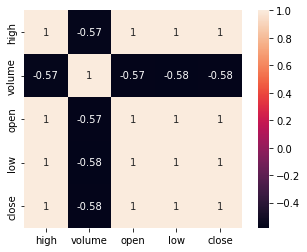




LHX
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  191.389999       0.0  186.770004  182.000000   
1     2020-03-09 09:30:00  191.699997  255523.0  190.395996  188.500000   
2     2020-03-09 10:30:00  192.990005  212185.0  190.389999  189.760101   
3     2020-03-09 11:30:00  190.399994  142770.0  190.009995  188.070007   
4     2020-03-09 12:30:00  188.330002  207723.0  188.220001  184.729996   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  276.223907  194192.0  274.154999  271.420013   
3519  2022-03-07 13:30:00  275.964996  197051.0  272.820007  272.329987   
3520  2022-03-07 14:30:00  277.399994  322489.0  275.540009  271.410004   
3521  2022-03-07 15:30:00  272.549988  226821.0  271.970001  270.700012   
3522  2022-03-07 16:00:00  270.739990       0.0  270.739990  270.739990   

           close  
0     190.520004  
1     190.369995  
2     190.160004  
3     188.320007

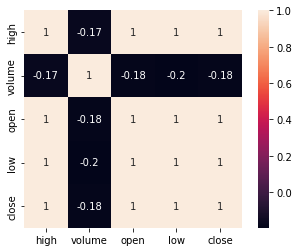




DAL
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  44.799999  5422645.0  43.040001  42.880001   
1     2020-03-09 09:30:00  44.889999  4367987.0  44.299999  44.056702   
2     2020-03-09 10:30:00  45.009998  2513199.0  44.430000  44.090000   
3     2020-03-09 11:30:00  44.080002  3027590.0  44.080002  42.959999   
4     2020-03-09 12:30:00  43.064999  2730394.0  43.029999  42.430000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  31.715000  3739396.0  31.660000  31.139900   
3519  2022-03-07 13:30:00  31.530001  3064177.0  31.240000  30.785000   
3520  2022-03-07 14:30:00  30.844999  4760719.0  30.834999  29.980000   
3521  2022-03-07 15:30:00  30.490000  5195403.0  30.485001  30.010000   
3522  2022-03-07 16:00:00  30.110001        0.0  30.110001  30.110001   

          close  
0     44.299999  
1     44.459999  
2     44.169998  
3     43.040001  
4     42.615002  
...     

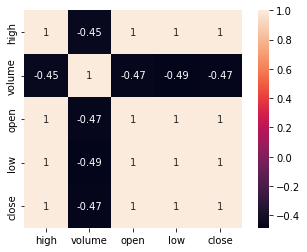




ROK
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  165.459000  301236.0  156.419998  155.839996   
1     2020-03-09 09:30:00  164.250000  264289.0  163.520004  159.514999   
2     2020-03-09 10:30:00  164.440002  188732.0  163.449997  160.559998   
3     2020-03-09 11:30:00  160.479996  252386.0  160.440002  154.729996   
4     2020-03-09 12:30:00  155.160004  319917.0  154.850006  151.630005   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  268.644989   67891.0  267.179993  266.100006   
3519  2022-03-07 13:30:00  268.125000   87527.0  266.234985  265.880005   
3520  2022-03-07 14:30:00  267.524994   71264.0  267.049988  266.002899   
3521  2022-03-07 15:30:00  266.829987  142746.0  266.829987  264.320007   
3522  2022-03-07 16:00:00  264.540009       0.0  264.540009  264.540009   

           close  
0     163.570007  
1     163.449997  
2     160.580002  
3     154.740005

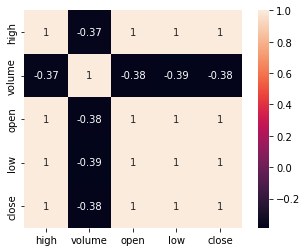




WAB
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  57.180000  460735.0  57.180000  55.279999   
1     2020-03-09 09:30:00  56.990002  413160.0  56.570000  55.360001   
2     2020-03-09 10:30:00  56.989899  314753.0  56.055000  55.509998   
3     2020-03-09 11:30:00  55.549999  286391.0  55.430000  54.930000   
4     2020-03-09 12:30:00  55.450001  334035.0  55.349998  54.459999   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  91.569901  103425.0  90.699997  90.385002   
3519  2022-03-07 13:30:00  91.599998  200007.0  91.480003  90.459999   
3520  2022-03-07 14:30:00  90.889999  125987.0  90.864998  90.349998   
3521  2022-03-07 15:30:00  90.779999  378595.0  90.709999  89.790001   
3522  2022-03-07 16:00:00  89.910004       0.0  89.910004  89.910004   

          close  
0     56.529999  
1     56.070000  
2     55.575001  
3     55.355000  
4     54.529999  
...         ...  
35

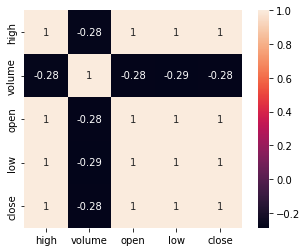




HWM
                timestamp       high     volume       open        low  \
0     2020-04-01 08:30:00  15.400000        0.0  15.400000  12.710100   
1     2020-04-01 09:30:00  14.300000   243592.0  14.300000  13.400000   
2     2020-04-01 10:30:00  13.650000    88879.0  13.645000  13.610000   
3     2020-04-01 11:30:00  13.620000   299151.0  13.610000  13.030000   
4     2020-04-01 12:30:00  13.570000   229453.0  13.450000  13.320000   
...                   ...        ...        ...        ...        ...   
3399  2022-03-07 12:30:00  33.150002   295648.0  32.939999  32.820000   
3400  2022-03-07 13:30:00  33.049999   451171.0  32.834999  32.750000   
3401  2022-03-07 14:30:00  33.040001   455617.0  32.919998  32.590000   
3402  2022-03-07 15:30:00  32.770000  1063387.0  32.770000  32.349998   
3403  2022-03-07 16:00:00  32.419998        0.0  32.419998  32.419998   

          close  
0     14.330000  
1     13.645000  
2     13.610000  
3     13.450000  
4     13.460000  
...     

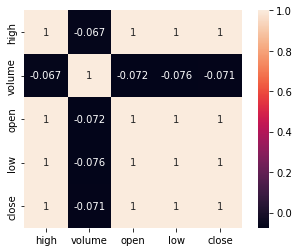




AAL
                timestamp     high      volume     open    low    close
0     2020-03-09 08:30:00  15.7127  10967039.0  14.8700  14.80  15.3850
1     2020-03-09 09:30:00  15.6400   7247199.0  15.3800  14.93  15.0250
2     2020-03-09 10:30:00  15.4200   4930717.0  15.0300  14.97  15.0650
3     2020-03-09 11:30:00  14.9990   5389440.0  14.9800  14.62  14.6500
4     2020-03-09 12:30:00  14.7450   3867673.0  14.6551  14.46  14.5561
...                   ...      ...         ...      ...    ...      ...
3518  2022-03-07 12:30:00  13.6359   7999888.0  13.6000  13.43  13.4800
3519  2022-03-07 13:30:00  13.5850   9328818.0  13.4800  13.16  13.1850
3520  2022-03-07 14:30:00  13.2000  13617852.0  13.1800  12.85  13.0700
3521  2022-03-07 15:30:00  13.0650  13325653.0  13.0650  12.77  12.8250
3522  2022-03-07 16:00:00  12.8400         0.0  12.8400  12.84  12.8400

[3523 rows x 6 columns]

--- Shape ---
Number of records: 3523
Number of attributes: 6

--- Types ---
timestamp     object
high 

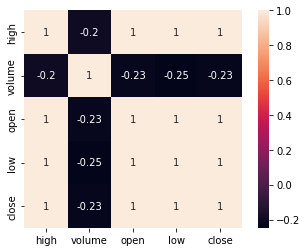




AME
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   84.730003  429909.0   79.989998   76.760101   
1     2020-03-09 09:30:00   81.970001  331578.0   81.930000   79.980003   
2     2020-03-09 10:30:00   81.129997  320883.0   80.129997   79.650101   
3     2020-03-09 11:30:00   79.790001  357277.0   79.750000   77.699997   
4     2020-03-09 12:30:00   77.849998  384556.0   77.710098   75.740097   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  129.759995  116245.0  128.630005  128.335007   
3519  2022-03-07 13:30:00  130.330002  173355.0  129.414993  129.190002   
3520  2022-03-07 14:30:00  130.339996  180819.0  129.860001  129.669998   
3521  2022-03-07 15:30:00  130.289993  313757.0  130.139999  129.460007   
3522  2022-03-07 16:00:00  129.500000       0.0  129.500000  129.500000   

           close  
0      81.870003  
1      80.220001  
2      79.849998  
3      77.790001

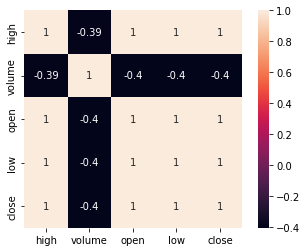




CARR
                timestamp       high     volume       open        low  \
0     2020-04-03 08:30:00  15.220000  5763248.0  13.800000  13.280000   
1     2020-04-03 09:30:00  14.925000  3876863.0  14.680000  14.230000   
2     2020-04-03 10:30:00  15.120000  2800060.0  14.555000  14.540000   
3     2020-04-03 11:30:00  15.500000  2823417.0  14.909000  14.730000   
4     2020-04-03 12:30:00  16.080000  4643647.0  15.480000  15.350000   
...                   ...        ...        ...        ...        ...   
3385  2022-03-07 12:30:00  44.110001   655643.0  43.990002  43.660000   
3386  2022-03-07 13:30:00  44.070000   659325.0  43.974998  43.580002   
3387  2022-03-07 14:30:00  43.865002   625817.0  43.660000  43.549999   
3388  2022-03-07 15:30:00  43.865002  1677476.0  43.865002  43.470001   
3389  2022-03-07 16:00:00  43.520000        0.0  43.520000  43.520000   

          close  
0     14.680000  
1     14.555000  
2     14.905000  
3     15.470000  
4     15.850000  
...    

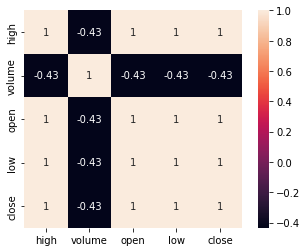




UPS
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   92.000000  995044.0   88.440002   88.440002   
1     2020-03-09 09:30:00   89.379997  939187.0   89.199997   87.750000   
2     2020-03-09 10:30:00   91.139999  941139.0   88.890099   88.529999   
3     2020-03-09 11:30:00   89.989998  768372.0   89.910004   88.709999   
4     2020-03-09 12:30:00   88.779999  980825.0   88.779900   87.300003   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  202.729996  459390.0  201.360001  200.149994   
3519  2022-03-07 13:30:00  202.270004  333311.0  201.470001  200.640106   
3520  2022-03-07 14:30:00  202.130005  525449.0  201.550003  200.639999   
3521  2022-03-07 15:30:00  202.559998  960937.0  201.720001  201.089996   
3522  2022-03-07 16:00:00  201.179993       0.0  201.179993  201.179993   

           close  
0      89.220001  
1      88.949997  
2      89.930000  
3      88.745003

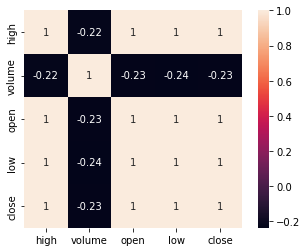




SNA
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  136.500000       0.0  134.789993  130.339996   
1     2020-03-09 09:30:00  137.160004  118300.0  135.460007  134.100006   
2     2020-03-09 10:30:00  137.509995  102846.0  136.750000  134.020004   
3     2020-03-09 11:30:00  134.050003  130087.0  133.960007  132.524994   
4     2020-03-09 12:30:00  132.759995  108406.0  132.740005  130.570007   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  205.000000   51100.0  201.830002  201.410004   
3519  2022-03-07 13:30:00  205.580002   51854.0  205.009995  204.940002   
3520  2022-03-07 14:30:00  205.929993   45497.0  205.119995  205.009995   
3521  2022-03-07 15:30:00  205.770004  109964.0  205.770004  203.990005   
3522  2022-03-07 16:00:00  204.149994       0.0  204.149994  204.149994   

           close  
0     135.320007  
1     136.875000  
2     134.050003  
3     132.800003

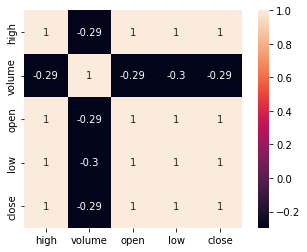




CTLT
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  46.500000       0.0  45.720001  44.119999   
1     2020-03-09 09:30:00  45.020000  173662.0  45.020000  43.150002   
2     2020-03-09 10:30:00  45.160000  125867.0  43.680000  43.615002   
3     2020-03-09 11:30:00  45.049999  148382.0  44.770000  44.279999   
4     2020-03-09 12:30:00  44.689999  158990.0  44.680000  43.980000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  98.849998  123198.0  98.029999  97.860001   
3519  2022-03-07 13:30:00  98.800003  138407.0  98.139999  98.139999   
3520  2022-03-07 14:30:00  98.709999  156968.0  98.529999  97.779999   
3521  2022-03-07 15:30:00  98.820000  376723.0  98.570000  98.150002   
3522  2022-03-07 16:00:00  98.550003       0.0  98.550003  98.550003   

          close  
0     45.009998  
1     43.680000  
2     44.974998  
3     44.689999  
4     44.259998  
...         ...  
3

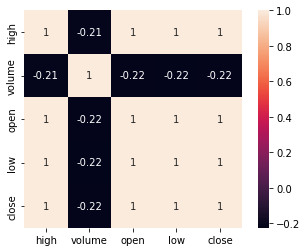




A
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   74.190002  652383.0   72.589996   71.300003   
1     2020-03-09 09:30:00   72.150002  700781.0   71.695000   70.510201   
2     2020-03-09 10:30:00   72.625000  656623.0   71.919998   71.625000   
3     2020-03-09 11:30:00   72.464996  392253.0   72.199997   71.809998   
4     2020-03-09 12:30:00   72.089996  405680.0   71.989998   70.644997   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  131.300003  252641.0  129.774994  129.690002   
3519  2022-03-07 13:30:00  131.755005  186895.0  131.100006  130.979996   
3520  2022-03-07 14:30:00  131.365005  292197.0  131.300003  130.050003   
3521  2022-03-07 15:30:00  130.815002  472544.0  130.570007  130.169998   
3522  2022-03-07 16:00:00  130.339996       0.0  130.339996  130.339996   

           close  
0      71.669998  
1      71.989998  
2      72.290001  
3      72.059700  

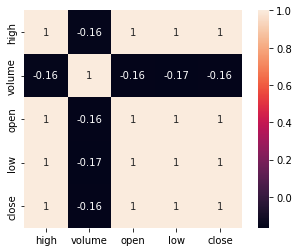




REGN
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  486.690002  234122.0  466.940002  466.149994   
1     2020-03-09 09:30:00  483.589996  187207.0  479.660004  469.920013   
2     2020-03-09 10:30:00  484.970001  116172.0  480.049988  478.410004   
3     2020-03-09 11:30:00  481.760010  101867.0  480.970001  473.660095   
4     2020-03-09 12:30:00  474.970001  118722.0  473.630005  468.589996   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  629.549988   63256.0  625.090027  624.289978   
3519  2022-03-07 13:30:00  625.520020   71778.0  625.299988  609.010010   
3520  2022-03-07 14:30:00  620.789978   62224.0  619.000000  617.109985   
3521  2022-03-07 15:30:00  619.440002  109966.0  619.369995  616.909973   
3522  2022-03-07 16:00:00  618.590027       0.0  618.590027  618.590027   

           close  
0     479.000000  
1     480.390015  
2     480.644989  
3     474.45999

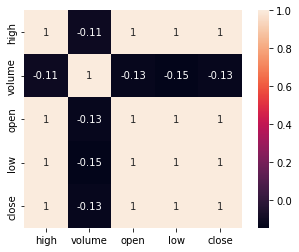




ZTS
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  132.809998  330927.0  128.800003  127.589996   
1     2020-03-09 09:30:00  132.589996  298688.0  132.070007  129.020004   
2     2020-03-09 10:30:00  133.289993  304294.0  131.360001  131.000000   
3     2020-03-09 11:30:00  132.970001  361002.0  132.523407  131.110001   
4     2020-03-09 12:30:00  132.247894  314591.0  132.130005  129.699997   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  189.384995  187436.0  188.669998  188.125000   
3519  2022-03-07 13:30:00  189.880005  186623.0  189.371002  188.764999   
3520  2022-03-07 14:30:00  190.070007  189119.0  189.660004  188.759995   
3521  2022-03-07 15:30:00  188.994995  260929.0  188.979996  187.899994   
3522  2022-03-07 16:00:00  188.089996       0.0  188.089996  188.089996   

           close  
0     132.190002  
1     131.738998  
2     132.500000  
3     132.130005

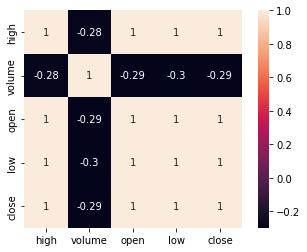




JNJ
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00  139.380005  1846412.0  136.330002  135.740005   
1     2020-03-09 09:30:00  138.679993  1565766.0  138.130005  136.119995   
2     2020-03-09 10:30:00  139.679901   990152.0  138.250000  137.735001   
3     2020-03-09 11:30:00  138.070007  1232124.0  137.750000  136.869995   
4     2020-03-09 12:30:00  137.029999  1214022.0  136.960007  135.009995   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  172.809998  1514830.0  170.419998  170.289993   
3519  2022-03-07 13:30:00  172.899994  1352926.0  172.550003  171.937805   
3520  2022-03-07 14:30:00  173.119995  1464734.0  172.664993  172.226807   
3521  2022-03-07 15:30:00  172.862701  2031694.0  172.679993  172.059998   
3522  2022-03-07 16:00:00  172.210007        0.0  172.210007  172.210007   

           close  
0     138.089996  
1     138.279999  
2     137.750000  
3   

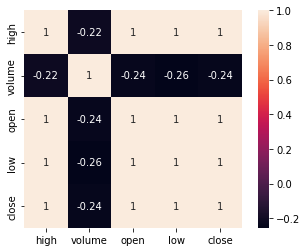




CAH
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  48.840000       0.0  48.000000  47.110001   
1     2020-03-09 09:30:00  49.189999  587836.0  48.689999  48.160000   
2     2020-03-09 10:30:00  49.740002  469242.0  48.740002  48.582001   
3     2020-03-09 11:30:00  49.200001  261088.0  48.915001  48.650002   
4     2020-03-09 12:30:00  48.919998  619847.0  48.869999  47.520000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  52.919998  289507.0  52.689999  52.570000   
3519  2022-03-07 13:30:00  52.980000  448997.0  52.810001  52.558300   
3520  2022-03-07 14:30:00  52.660000  324709.0  52.615002  52.450001   
3521  2022-03-07 15:30:00  52.639999  637410.0  52.520000  52.380001   
3522  2022-03-07 16:00:00  52.430000       0.0  52.430000  52.430000   

          close  
0     48.660000  
1     48.779999  
2     49.000000  
3     48.889999  
4     48.090000  
...         ...  
35

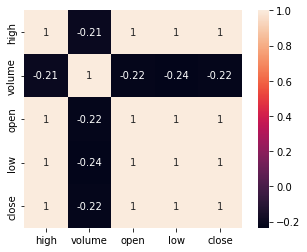




TFX
                timestamp        high   volume        open         low  \
0     2020-03-09 08:30:00  335.140015      0.0  325.709991  322.382904   
1     2020-03-09 09:30:00  335.019989  54759.0  334.010010  328.420013   
2     2020-03-09 10:30:00  341.480011  38656.0  334.869995  334.239990   
3     2020-03-09 11:30:00  339.260010  51868.0  337.730011  336.320007   
4     2020-03-09 12:30:00  339.399994  72524.0  337.540009  332.829987   
...                   ...         ...      ...         ...         ...   
3518  2022-03-07 12:30:00  349.850006  25788.0  348.220001  347.609985   
3519  2022-03-07 13:30:00  350.600006  26288.0  348.575012  348.279999   
3520  2022-03-07 14:30:00  349.869995  33117.0  349.869995  346.709991   
3521  2022-03-07 15:30:00  348.809998  84621.0  348.049988  347.250000   
3522  2022-03-07 16:00:00  347.250000      0.0  347.250000  347.250000   

           close  
0     333.920013  
1     334.779999  
2     337.760010  
3     337.515015  
4     336

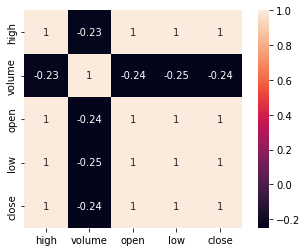




HSIC
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  56.009998       0.0  55.060001  53.689999   
1     2020-03-09 09:30:00  54.810001  286593.0  54.290001  53.759998   
2     2020-03-09 10:30:00  55.259998  336134.0  54.389999  54.189999   
3     2020-03-09 11:30:00  55.169998  266671.0  54.709999  54.490002   
4     2020-03-09 12:30:00  54.950001  254635.0  54.939999  54.500000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  87.760002  126622.0  86.959999  86.699997   
3519  2022-03-07 13:30:00  88.614998  197473.0  87.669998  87.660004   
3520  2022-03-07 14:30:00  88.389999  210096.0  88.385002  87.419998   
3521  2022-03-07 15:30:00  87.410004  336053.0  87.410004  86.809998   
3522  2022-03-07 16:00:00  86.860001       0.0  86.860001  86.860001   

          close  
0     54.279999  
1     54.415001  
2     54.689999  
3     54.980000  
4     54.560001  
...         ...  
3

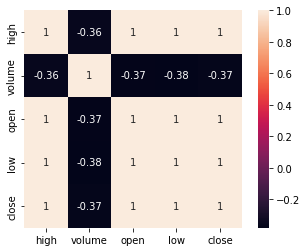




ALGN
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  214.971893  187961.0  209.259995  202.960098   
1     2020-03-09 09:30:00  218.839996  218875.0  213.460007  210.740005   
2     2020-03-09 10:30:00  218.339996  100519.0  216.160004  214.470001   
3     2020-03-09 11:30:00  217.080002   93824.0  215.750107  214.729996   
4     2020-03-09 12:30:00  217.080002  149628.0  216.100006  214.035004   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  447.630005   85001.0  445.260010  443.660004   
3519  2022-03-07 13:30:00  449.230011   92168.0  444.429993  442.630005   
3520  2022-03-07 14:30:00  446.369995   94276.0  446.369995  440.179993   
3521  2022-03-07 15:30:00  441.609985  212087.0  441.410004  434.640015   
3522  2022-03-07 16:00:00  435.570007       0.0  435.570007  435.570007   

           close  
0     213.695007  
1     216.630005  
2     215.994995  
3     216.16499

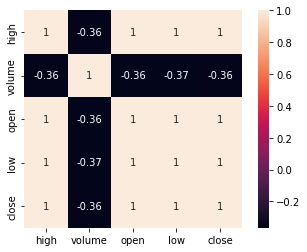




ABC
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   82.779999  573063.0   79.690002   77.559998   
1     2020-03-09 09:30:00   82.889999  402492.0   82.019997   80.970001   
2     2020-03-09 10:30:00   84.690002  227436.0   82.510002   82.400002   
3     2020-03-09 11:30:00   84.360001  224687.0   82.989998   82.540001   
4     2020-03-09 12:30:00   85.830002  636707.0   83.900002   83.120003   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  145.621094  123355.0  145.429993  144.820007   
3519  2022-03-07 13:30:00  145.729996  113712.0  145.300003  144.979996   
3520  2022-03-07 14:30:00  145.669998  141043.0  145.320007  144.889999   
3521  2022-03-07 15:30:00  145.585007  261737.0  145.100006  144.789993   
3522  2022-03-07 16:00:00  144.839996       0.0  144.839996  144.839996   

           close  
0      82.019997  
1      82.599998  
2      83.190002  
3      83.889999

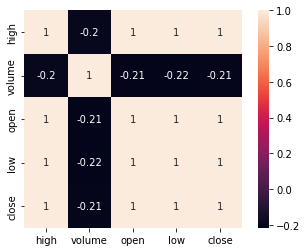




BAX
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  81.330002  766974.0  80.650002  78.120003   
1     2020-03-09 09:30:00  81.400002  442553.0  80.989998  79.550003   
2     2020-03-09 10:30:00  81.730003  281599.0  80.574997  80.279999   
3     2020-03-09 11:30:00  80.739998  322018.0  80.610001  79.894997   
4     2020-03-09 12:30:00  79.970001  298196.0  79.949997  78.599998   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  84.419998  207988.0  84.070000  83.970001   
3519  2022-03-07 13:30:00  84.989998  182087.0  84.400002  84.394997   
3520  2022-03-07 14:30:00  85.010002  244923.0  84.870003  84.669998   
3521  2022-03-07 15:30:00  85.089996  967949.0  84.889999  84.610001   
3522  2022-03-07 16:00:00  84.980003       0.0  84.980003  84.980003   

          close  
0     81.000000  
1     80.570000  
2     80.610001  
3     79.970001  
4     78.820000  
...         ...  
35

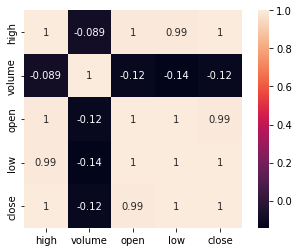




UHS
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  120.970001       0.0  120.970001  117.330002   
1     2020-03-09 09:30:00  118.970001  183142.0  118.230003  115.964996   
2     2020-03-09 10:30:00  118.989998   85731.0  116.410004  116.139999   
3     2020-03-09 11:30:00  116.995003   81475.0  116.870003  115.430000   
4     2020-03-09 12:30:00  115.349998  100409.0  115.320000  113.510002   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  148.850006   64152.0  148.399994  148.179993   
3519  2022-03-07 13:30:00  149.740005   60677.0  148.679993  148.494995   
3520  2022-03-07 14:30:00  149.720001   66922.0  149.475006  149.039993   
3521  2022-03-07 15:30:00  150.630005  164846.0  149.600006  149.520004   
3522  2022-03-07 16:00:00  150.419998       0.0  150.419998  150.419998   

           close  
0     118.279999  
1     116.574997  
2     117.120003  
3     115.430000

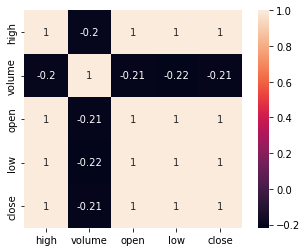




ABMD
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  155.839996  147760.0  148.500000  147.070007   
1     2020-03-09 09:30:00  155.050003  121466.0  153.850006  151.800003   
2     2020-03-09 10:30:00  156.414993  175220.0  154.240005  153.375000   
3     2020-03-09 11:30:00  155.649994   91490.0  155.505005  153.339996   
4     2020-03-09 12:30:00  154.669998   98630.0  153.529999  151.929993   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  306.524994   28197.0  304.600006  302.359985   
3519  2022-03-07 13:30:00  304.394989   42990.0  302.829987  301.540009   
3520  2022-03-07 14:30:00  304.010010   48671.0  304.010010  297.850006   
3521  2022-03-07 15:30:00  300.000000   81636.0  300.000000  297.239990   
3522  2022-03-07 16:00:00  298.640015       0.0  298.640015  298.640015   

           close  
0     153.929993  
1     154.210007  
2     155.369995  
3     153.55000

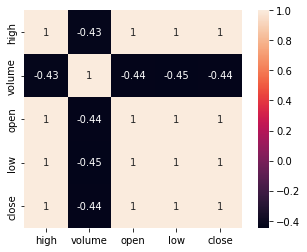




TRMB
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  38.799999  194574.0  37.310001  36.709999   
1     2020-03-09 09:30:00  37.110001  273341.0  36.930000  36.349998   
2     2020-03-09 10:30:00  37.900002  359840.0  36.930000  36.900002   
3     2020-03-09 11:30:00  37.560001  230393.0  37.509998  37.209999   
4     2020-03-09 12:30:00  37.270000  283410.0  37.240002  36.154999   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  64.870003  143166.0  64.389999  64.074303   
3519  2022-03-07 13:30:00  64.512100  179523.0  64.095001  63.895000   
3520  2022-03-07 14:30:00  64.260002  254781.0  64.224998  63.610001   
3521  2022-03-07 15:30:00  64.080002  439747.0  64.059998  63.509998   
3522  2022-03-07 16:00:00  63.540001       0.0  63.540001  63.540001   

          close  
0     36.895000  
1     36.945000  
2     37.419998  
3     37.259998  
4     36.279999  
...         ...  
3

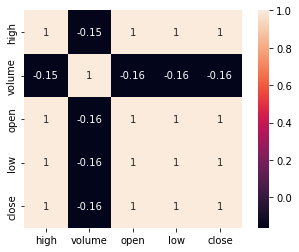




CDAY
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  62.320000       0.0  60.340000  58.290001   
1     2020-03-09 09:30:00  61.400002  365764.0  61.080002  60.470001   
2     2020-03-09 10:30:00  62.785000  185174.0  61.180000  61.000000   
3     2020-03-09 11:30:00  62.349998  161529.0  61.785000  61.099998   
4     2020-03-09 12:30:00  62.230000  172355.0  62.230000  60.799999   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  65.339996  132879.0  63.849998  63.820000   
3519  2022-03-07 13:30:00  65.040001  165678.0  64.449997  64.070000   
3520  2022-03-07 14:30:00  64.730003  339476.0  64.699997  63.770000   
3521  2022-03-07 15:30:00  64.040001  490252.0  64.040001  63.310001   
3522  2022-03-07 16:00:00  63.560001       0.0  63.560001  63.560001   

          close  
0     61.130001  
1     61.349998  
2     61.820000  
3     62.150002  
4     61.115002  
...         ...  
3

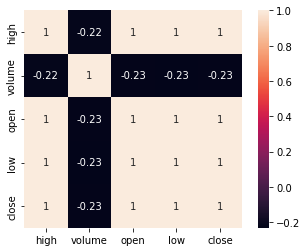




AKAM
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   85.564499  385607.0   83.800003   83.244698   
1     2020-03-09 09:30:00   85.445000  210639.0   85.250000   83.580002   
2     2020-03-09 10:30:00   86.684998  152926.0   85.169998   85.000000   
3     2020-03-09 11:30:00   85.639999  120095.0   85.589996   84.820000   
4     2020-03-09 12:30:00   85.040001  118214.0   85.010002   83.379997   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  113.480003  209245.0  112.820000  112.680000   
3519  2022-03-07 13:30:00  113.669998  203021.0  113.140999  112.809998   
3520  2022-03-07 14:30:00  113.120003  264079.0  113.110001  112.050003   
3521  2022-03-07 15:30:00  112.449997  369144.0  112.430000  111.940002   
3522  2022-03-07 16:00:00  112.010002       0.0  112.010002  112.010002   

           close  
0      85.250000  
1      85.389999  
2      85.669998  
3      85.01000

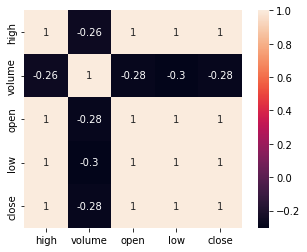




NXPI
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00  108.000000   777200.0  104.699997  103.709999   
1     2020-03-09 09:30:00  106.870003  1112118.0  106.190002  104.500000   
2     2020-03-09 10:30:00  107.300003   360950.0  105.805000  105.320000   
3     2020-03-09 11:30:00  105.720001   560792.0  105.580002  103.940002   
4     2020-03-09 12:30:00  104.169998   569043.0  104.059998  101.820000   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  175.190002   262875.0  173.570007  172.830002   
3519  2022-03-07 13:30:00  174.289993   213962.0  173.160004  172.279999   
3520  2022-03-07 14:30:00  173.300003   345692.0  173.089996  171.399994   
3521  2022-03-07 15:30:00  171.929993   637933.0  171.929993  169.550003   
3522  2022-03-07 16:00:00  169.720001        0.0  169.720001  169.720001   

           close  
0     106.199997  
1     105.790001  
2     105.402000  
3  

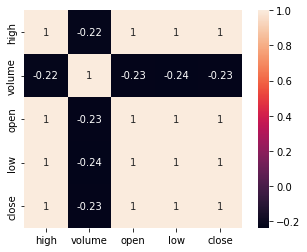




SNPS
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  131.259995  267093.0  128.110001  126.000000   
1     2020-03-09 09:30:00  130.490005  257544.0  130.130005  128.470093   
2     2020-03-09 10:30:00  132.669998  155206.0  129.668793  129.570007   
3     2020-03-09 11:30:00  131.710007  174492.0  131.419998  130.729996   
4     2020-03-09 12:30:00  131.039993  228630.0  130.979996  128.619995   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  304.529999   63191.0  303.100006  300.070007   
3519  2022-03-07 13:30:00  302.224304   69655.0  300.059998  299.054993   
3520  2022-03-07 14:30:00  300.130005   93122.0  299.950012  296.690002   
3521  2022-03-07 15:30:00  298.727509  190122.0  297.850006  295.380005   
3522  2022-03-07 16:00:00  295.459991       0.0  295.459991  295.459991   

           close  
0     129.949997  
1     129.919998  
2     131.210007  
3     131.02999

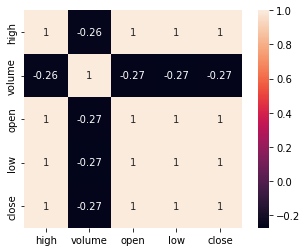




JNPR
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  20.590000  603008.0  20.370001  20.299999   
1     2020-03-09 09:30:00  20.520000  289897.0  20.389999  20.219999   
2     2020-03-09 10:30:00  20.600000  297836.0  20.450001  20.334999   
3     2020-03-09 11:30:00  20.334999  283421.0  20.330000  20.080000   
4     2020-03-09 12:30:00  20.084999  301458.0  20.080000  19.715000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  33.500000  359028.0  33.494999  33.235001   
3519  2022-03-07 13:30:00  33.480000  252566.0  33.384998  33.294998   
3520  2022-03-07 14:30:00  33.314999  376926.0  33.279999  33.105000   
3521  2022-03-07 15:30:00  33.220001  578599.0  33.185001  33.029999   
3522  2022-03-07 16:00:00  33.040001       0.0  33.040001  33.040001   

          close  
0     20.410000  
1     20.459999  
2     20.360001  
3     20.084999  
4     19.760000  
...         ...  
3

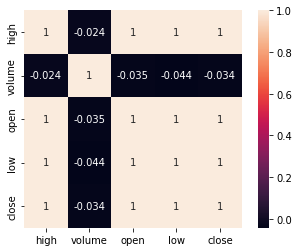




CDW
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  105.519997       0.0  102.150002  100.100098   
1     2020-03-09 09:30:00  105.059998  236387.0  104.089996  103.169998   
2     2020-03-09 10:30:00  104.980003  272005.0  104.014999  102.605003   
3     2020-03-09 11:30:00  103.040001  308057.0  102.620003  101.610001   
4     2020-03-09 12:30:00  101.769997  261281.0  101.599998   98.910004   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  168.539993   37143.0  167.110001  167.100006   
3519  2022-03-07 13:30:00  167.815002   62370.0  167.520004  167.110001   
3520  2022-03-07 14:30:00  167.190002   74435.0  167.149994  165.639999   
3521  2022-03-07 15:30:00  166.360001  138546.0  166.149994  165.399994   
3522  2022-03-07 16:00:00  165.440002       0.0  165.440002  165.440002   

           close  
0     103.910103  
1     104.059998  
2     102.629997  
3     101.680000

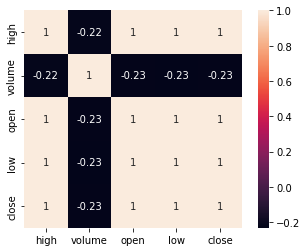




PYPL
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00  106.989998  2560285.0  102.720001   99.910004   
1     2020-03-09 09:30:00  105.559998  1579832.0  105.044998  103.489998   
2     2020-03-09 10:30:00  106.190002  1077159.0  104.879997  104.669998   
3     2020-03-09 11:30:00  105.459999   843756.0  105.250000  104.264999   
4     2020-03-09 12:30:00  104.330002  1099663.0  104.300003  102.589996   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00   97.480003  2851398.0   95.910004   95.470001   
3519  2022-03-07 13:30:00   96.269997  2132330.0   95.580002   95.209999   
3520  2022-03-07 14:30:00   95.507202  3527447.0   95.489998   94.339996   
3521  2022-03-07 15:30:00   94.970001  2820068.0   94.930000   93.500000   
3522  2022-03-07 16:00:00   93.610001        0.0   93.610001   93.610001   

           close  
0     105.044998  
1     104.949997  
2     105.080002  
3  

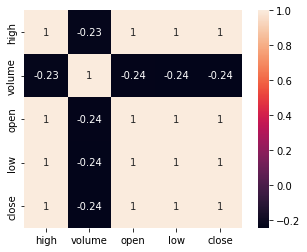




VRSN
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  184.080002       0.0  181.050003  179.289993   
1     2020-03-09 09:30:00  185.070007  124335.0  183.850006  183.050003   
2     2020-03-09 10:30:00  185.750000   77690.0  184.080002  183.029999   
3     2020-03-09 11:30:00  183.320007   96323.0  183.199997  181.500000   
4     2020-03-09 12:30:00  181.445007   93479.0  181.445007  178.465698   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  217.029999   43510.0  216.410004  215.500000   
3519  2022-03-07 13:30:00  216.619995   61191.0  215.815002  215.369995   
3520  2022-03-07 14:30:00  216.610001   88610.0  216.509995  215.475006   
3521  2022-03-07 15:30:00  215.750000   92347.0  215.740005  214.809998   
3522  2022-03-07 16:00:00  214.850006       0.0  214.850006  214.850006   

           close  
0     183.779999  
1     184.259995  
2     183.060104  
3     181.50000

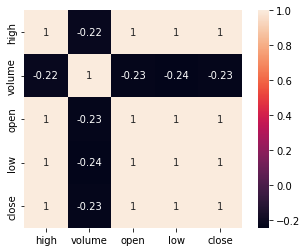




GPN
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  169.929993  535613.0  166.750000  161.350006   
1     2020-03-09 09:30:00  168.559998  395593.0  168.110001  165.789993   
2     2020-03-09 10:30:00  170.690002  253267.0  168.205002  167.839996   
3     2020-03-09 11:30:00  168.940002  341554.0  168.690002  166.790100   
4     2020-03-09 12:30:00  167.600006  244018.0  167.494995  164.440002   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  125.110001  220698.0  123.750000  123.675003   
3519  2022-03-07 13:30:00  124.800003  196232.0  124.650002  123.675003   
3520  2022-03-07 14:30:00  123.959999  269280.0  123.809998  122.845001   
3521  2022-03-07 15:30:00  123.320000  556885.0  123.320000  122.589996   
3522  2022-03-07 16:00:00  122.650002       0.0  122.650002  122.650002   

           close  
0     168.100006  
1     168.289993  
2     168.399994  
3     167.610001

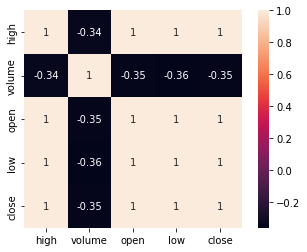




AMD
                timestamp        high      volume        open         low  \
0     2020-03-09 08:30:00   45.706600  19150952.0   43.029999   42.509998   
1     2020-03-09 09:30:00   45.634998  11092529.0   45.060001   44.299999   
2     2020-03-09 10:30:00   46.340000  10495062.0   45.189899   44.910000   
3     2020-03-09 11:30:00   45.570000   8078521.0   45.459999   44.744999   
4     2020-03-09 12:30:00   44.830002  10527825.0   44.830002   43.540100   
...                   ...         ...         ...         ...         ...   
3518  2022-03-07 12:30:00  106.862503   9467458.0  105.610001  105.209999   
3519  2022-03-07 13:30:00  106.419998   8367433.0  105.529999  105.150002   
3520  2022-03-07 14:30:00  105.370003  10514845.0  105.300003  103.389999   
3521  2022-03-07 15:30:00  104.080002   8542877.0  104.080002  102.820000   
3522  2022-03-07 16:00:00  102.949997         0.0  102.949997  102.949997   

           close  
0      45.050098  
1      45.189999  
2      45.4

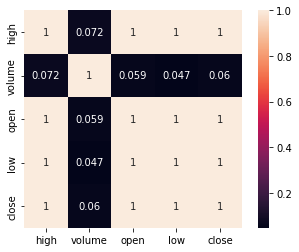




APH
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  49.049999       0.0  43.334999  43.090000   
1     2020-03-09 09:30:00  44.544998  316758.0  44.099998  43.799999   
2     2020-03-09 10:30:00  44.849998  216614.0  44.404999  44.040001   
3     2020-03-09 11:30:00  44.244999  244126.0  44.099998  43.355000   
4     2020-03-09 12:30:00  43.369999  259755.0  43.369999  42.525002   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  73.959999  232627.0  73.720001  73.345001   
3519  2022-03-07 13:30:00  74.019997  251583.0  73.519997  73.400002   
3520  2022-03-07 14:30:00  73.775002  436393.0  73.709999  73.070000   
3521  2022-03-07 15:30:00  73.419998  635331.0  73.410004  72.750000   
3522  2022-03-07 16:00:00  72.820000       0.0  72.820000  72.820000   

          close  
0     44.110001  
1     44.450001  
2     44.105000  
3     43.384998  
4     42.702499  
...         ...  
35

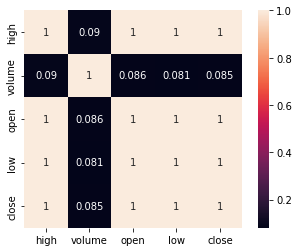




AAPL
                timestamp        high      volume        open         low  \
0     2020-03-09 08:30:00   69.345001  17530771.0   66.432503   66.290497   
1     2020-03-09 09:30:00   68.837479   9571797.0   68.580002   67.507500   
2     2020-03-09 10:30:00   69.522499   8277722.0   68.235001   67.879997   
3     2020-03-09 11:30:00   69.087502   6313249.0   68.732498   68.275002   
4     2020-03-09 12:30:00   68.360001   7124613.0   68.360001   67.000000   
...                   ...         ...         ...         ...         ...   
3518  2022-03-07 12:30:00  162.229996   9310348.0  161.669998  160.899994   
3519  2022-03-07 13:30:00  161.889999   7903678.0  161.039993  160.800003   
3520  2022-03-07 14:30:00  161.169998  11169099.0  161.070007  159.750000   
3521  2022-03-07 15:30:00  160.380005  11806736.0  160.339996  159.039993   
3522  2022-03-07 16:00:00  159.300003         0.0  159.300003  159.300003   

           close  
0      68.580002  
1      68.250000  
2      68.

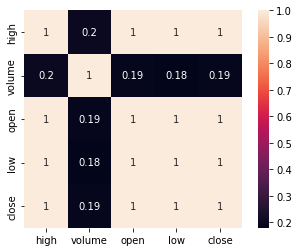




TXN
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00  109.529999  1223089.0  105.029999  105.029999   
1     2020-03-09 09:30:00  108.580002   789164.0  107.919998  107.050003   
2     2020-03-09 10:30:00  110.080002   779848.0  108.199997  107.900002   
3     2020-03-09 11:30:00  108.690002   665281.0  108.629997  106.980003   
4     2020-03-09 12:30:00  107.264999   695934.0  107.220001  105.260002   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  168.000000   497382.0  166.809998  166.440002   
3519  2022-03-07 13:30:00  167.176697   558952.0  166.565002  165.860001   
3520  2022-03-07 14:30:00  166.929092   469175.0  166.649994  165.490005   
3521  2022-03-07 15:30:00  166.380005  1287753.0  166.027206  164.759995   
3522  2022-03-07 16:00:00  164.889999        0.0  164.889999  164.889999   

           close  
0     107.980003  
1     108.250000  
2     108.480003  
3   

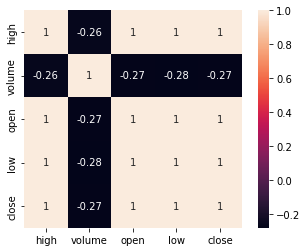




QCOM
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00   75.300003  2547468.0   72.400002   71.830002   
1     2020-03-09 09:30:00   74.790001  1550108.0   73.709999   73.430000   
2     2020-03-09 10:30:00   76.099998  1097362.0   74.730003   74.500000   
3     2020-03-09 11:30:00   75.129997  1063512.0   75.070000   74.000000   
4     2020-03-09 12:30:00   74.080002  1363524.0   74.059998   72.919998   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  154.990005  1495195.0  153.940002  152.729996   
3519  2022-03-07 13:30:00  154.490005  1273197.0  153.090103  152.350006   
3520  2022-03-07 14:30:00  153.132004  1607998.0  153.085007  150.699997   
3521  2022-03-07 15:30:00  151.380005  2018523.0  151.380005  150.000000   
3522  2022-03-07 16:00:00  150.100006        0.0  150.100006  150.100006   

           close  
0      73.730003  
1      74.720001  
2      75.084999  
3  

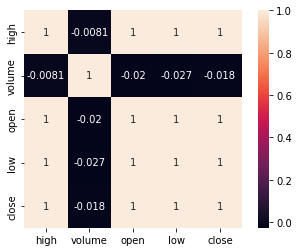




FB
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00  172.580002  9921333.0  169.600006  165.199997   
1     2020-03-09 09:30:00  172.800003  3171074.0  170.300003  170.000000   
2     2020-03-09 10:30:00  175.000000  2842278.0  172.169998  171.699997   
3     2020-03-09 11:30:00  173.250000  2033205.0  173.000000  170.929993   
4     2020-03-09 12:30:00  171.250000  2273856.0  171.139999  169.479996   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  191.139999  4407952.0  189.630005  189.050003   
3519  2022-03-07 13:30:00  191.259995  3152660.0  189.360001  189.210007   
3520  2022-03-07 14:30:00  191.039993  3349597.0  190.815002  188.399994   
3521  2022-03-07 15:30:00  189.199997  4016207.0  189.199997  187.279999   
3522  2022-03-07 16:00:00  187.470001        0.0  187.470001  187.470001   

           close  
0     170.329895  
1     172.134995  
2     172.770004  
3    

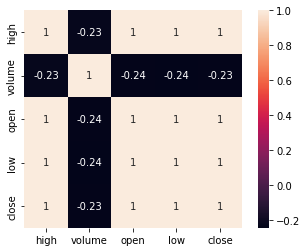




CHTR
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  476.269989  337143.0  466.579987  462.850006   
1     2020-03-09 09:30:00  475.380005  411633.0  474.579987  467.010010   
2     2020-03-09 10:30:00  478.619995  251635.0  472.649994  470.709900   
3     2020-03-09 11:30:00  475.980011  210507.0  474.230011  471.470001   
4     2020-03-09 12:30:00  473.214996  225963.0  473.214996  464.720001   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  565.809998  246914.0  557.020020  556.669983   
3519  2022-03-07 13:30:00  566.330017  236290.0  563.070007  561.619995   
3520  2022-03-07 14:30:00  563.109985  200757.0  562.450012  556.719971   
3521  2022-03-07 15:30:00  560.460022  304549.0  559.700012  555.309998   
3522  2022-03-07 16:00:00  555.640015       0.0  555.640015  555.640015   

           close  
0     473.121002  
1     473.850006  
2     474.450012  
3     473.42001

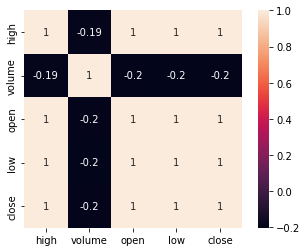




ATVI
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  57.625000  2155580.0  56.599998  55.430000   
1     2020-03-09 09:30:00  57.980000  2081140.0  57.060001  56.970001   
2     2020-03-09 10:30:00  59.119999  1562956.0  57.689899  57.480000   
3     2020-03-09 11:30:00  58.759998  1465932.0  58.639999  57.945000   
4     2020-03-09 12:30:00  58.480000  1291872.0  58.459999  57.340000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  81.160004   624539.0  81.059998  80.934998   
3519  2022-03-07 13:30:00  81.040001   582321.0  81.010002  80.820000   
3520  2022-03-07 14:30:00  80.919998  1112010.0  80.849998  80.489998   
3521  2022-03-07 15:30:00  80.699997  1419594.0  80.584999  80.400002   
3522  2022-03-07 16:00:00  80.550003        0.0  80.550003  80.550003   

          close  
0     57.070000  
1     57.680000  
2     58.799999  
3     58.459999  
4     57.500000  
...    

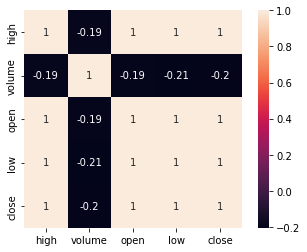




FOX
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  27.629999  370720.0  26.750000  26.420000   
1     2020-03-09 09:30:00  27.330000  341598.0  27.030001  26.690001   
2     2020-03-09 10:30:00  27.540001  296560.0  27.190001  27.090000   
3     2020-03-09 11:30:00  27.075001  488903.0  27.059999  26.639999   
4     2020-03-09 12:30:00  26.850000  752358.0  26.850000  26.580000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  38.542702   86915.0  38.330002  38.009998   
3519  2022-03-07 13:30:00  38.459999   82749.0  38.040001  38.009998   
3520  2022-03-07 14:30:00  38.360001   96010.0  38.308998  38.139999   
3521  2022-03-07 15:30:00  38.279999  172716.0  38.279999  37.990002   
3522  2022-03-07 16:00:00  38.029999       0.0  38.029999  38.029999   

          close  
0     27.040001  
1     27.209999  
2     27.094999  
3     26.850000  
4     26.660000  
...         ...  
35

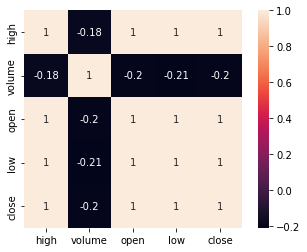




NWS
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  10.810000       0.0  10.740000  10.490000   
1     2020-03-09 09:30:00  10.790000  430909.0  10.640000  10.600000   
2     2020-03-09 10:30:00  10.850000   96158.0  10.760000  10.700000   
3     2020-03-09 11:30:00  10.710000  113829.0  10.690000  10.590000   
4     2020-03-09 12:30:00  10.620000   93299.0  10.600000  10.340000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  20.740000   51638.0  20.719999  20.580000   
3519  2022-03-07 13:30:00  20.780001   52767.0  20.610001  20.580000   
3520  2022-03-07 14:30:00  20.709999   65150.0  20.709999  20.549999   
3521  2022-03-07 15:30:00  20.670000  125451.0  20.670000  20.510000   
3522  2022-03-07 16:00:00  20.520000       0.0  20.520000  20.520000   

          close  
0     10.640000  
1     10.770000  
2     10.700000  
3     10.600000  
4     10.360000  
...         ...  
35

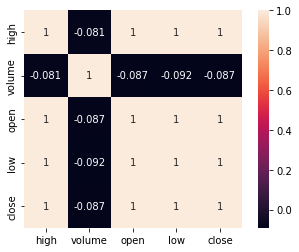




OMC
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  62.610001       0.0  62.610001  61.259998   
1     2020-03-09 09:30:00  62.200001  665550.0  61.840000  61.320000   
2     2020-03-09 10:30:00  62.619999  386682.0  61.919998  61.790001   
3     2020-03-09 11:30:00  62.160000  413743.0  62.040001  61.150002   
4     2020-03-09 12:30:00  61.590000  264548.0  61.590000  60.320000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  76.029999  380876.0  75.900002  75.175003   
3519  2022-03-07 13:30:00  76.529999  360580.0  75.209999  75.209999   
3520  2022-03-07 14:30:00  76.169998  349416.0  76.169998  75.300003   
3521  2022-03-07 15:30:00  75.779999  483941.0  75.779999  75.000000   
3522  2022-03-07 16:00:00  75.099998       0.0  75.099998  75.099998   

          close  
0     61.869999  
1     61.939999  
2     62.070000  
3     61.630001  
4     60.400002  
...         ...  
35

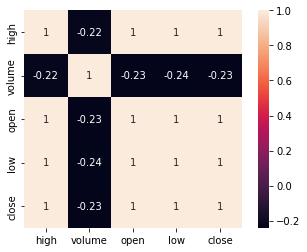




CAG
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  27.490000  484786.0  26.530001  26.010000   
1     2020-03-09 09:30:00  27.809999  631953.0  27.410000  27.040001   
2     2020-03-09 10:30:00  28.030001  433796.0  27.740000  27.580000   
3     2020-03-09 11:30:00  27.670000  501290.0  27.650000  27.430000   
4     2020-03-09 12:30:00  27.510000  668404.0  27.500000  27.010000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  34.279999  680979.0  34.160000  34.000000   
3519  2022-03-07 13:30:00  34.180000  488154.0  34.130001  33.904999   
3520  2022-03-07 14:30:00  34.040001  476666.0  33.945000  33.874901   
3521  2022-03-07 15:30:00  33.950001  971974.0  33.869999  33.680000   
3522  2022-03-07 16:00:00  33.700001       0.0  33.700001  33.700001   

          close  
0     27.450001  
1     27.750000  
2     27.610001  
3     27.520000  
4     27.160000  
...         ...  
35

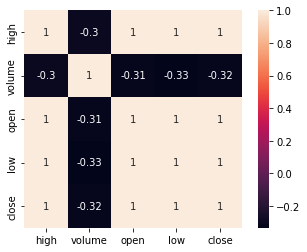




MO
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  40.810001  2191060.0  39.799999  39.619999   
1     2020-03-09 09:30:00  41.369999  2355062.0  40.419998  40.169998   
2     2020-03-09 10:30:00  41.764999  1591404.0  41.110001  41.009998   
3     2020-03-09 11:30:00  41.220001  1454258.0  41.169998  40.419998   
4     2020-03-09 12:30:00  40.459999  2262931.0  40.459999  39.435001   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  52.669998   866422.0  52.459999  52.285000   
3519  2022-03-07 13:30:00  52.855000   783896.0  52.625000  52.545300   
3520  2022-03-07 14:30:00  52.974998  1000170.0  52.676201  52.634998   
3521  2022-03-07 15:30:00  52.970001  1611091.0  52.860001  52.779999   
3522  2022-03-07 16:00:00  52.849998        0.0  52.849998  52.849998   

          close  
0     40.419998  
1     41.110001  
2     41.220001  
3     40.469299  
4     39.900002  
...      

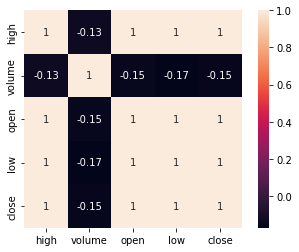




PM
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  83.930000  1144106.0  82.169998  81.150002   
1     2020-03-09 09:30:00  84.139999   732742.0  83.349998  82.320000   
2     2020-03-09 10:30:00  84.820000   669860.0  83.750000  83.500000   
3     2020-03-09 11:30:00  84.264999   836921.0  84.135002  81.949997   
4     2020-03-09 12:30:00  82.029999  1299439.0  82.010002  79.320000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  94.230003  1023520.0  93.613098  93.239998   
3519  2022-03-07 13:30:00  94.669998   962415.0  94.014999  93.989998   
3520  2022-03-07 14:30:00  94.589996   898247.0  94.199997  93.900002   
3521  2022-03-07 15:30:00  94.099998  2668907.0  94.099998  92.449997   
3522  2022-03-07 16:00:00  93.199997        0.0  93.199997  93.199997   

          close  
0     83.319702  
1     83.750000  
2     84.239998  
3     82.040001  
4     80.430000  
...      

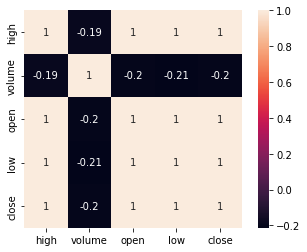




LW
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  79.989998  167135.0  79.760002  76.849998   
1     2020-03-09 09:30:00  79.410004  194793.0  77.675003  77.675003   
2     2020-03-09 10:30:00  79.959999  183450.0  79.089996  77.580002   
3     2020-03-09 11:30:00  77.535004  232939.0  77.510002  76.120003   
4     2020-03-09 12:30:00  76.349899  227691.0  76.345001  74.000000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  53.959999  168304.0  53.730000  53.230000   
3519  2022-03-07 13:30:00  53.880001  350976.0  53.270000  52.889999   
3520  2022-03-07 14:30:00  53.770000  316767.0  53.680000  52.494999   
3521  2022-03-07 15:30:00  52.660000  865886.0  52.509998  52.070000   
3522  2022-03-07 16:00:00  52.650002       0.0  52.650002  52.650002   

          close  
0     77.570000  
1     79.160004  
2     77.699997  
3     76.400002  
4     74.559998  
...         ...  
351

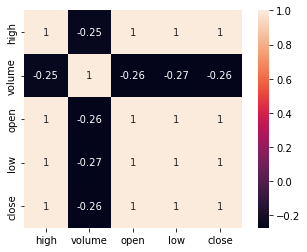




CL
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  70.949997  798657.0  69.300003  69.000000   
1     2020-03-09 09:30:00  71.000000  685381.0  70.639999  69.580002   
2     2020-03-09 10:30:00  71.610001  840748.0  70.900002  70.739998   
3     2020-03-09 11:30:00  71.510002  913537.0  71.430000  70.489998   
4     2020-03-09 12:30:00  70.805000  667754.0  70.805000  69.510002   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  76.919998  376808.0  76.455002  76.451500   
3519  2022-03-07 13:30:00  77.044998  336548.0  76.875000  76.639999   
3520  2022-03-07 14:30:00  76.915001  336340.0  76.735001  76.646301   
3521  2022-03-07 15:30:00  76.824997  675000.0  76.775002  76.519997   
3522  2022-03-07 16:00:00  76.680000       0.0  76.680000  76.680000   

          close  
0     70.519997  
1     70.930000  
2     71.269997  
3     70.805000  
4     69.932701  
...         ...  
351

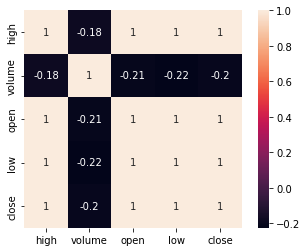




SJM
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  109.320000       0.0  104.410004  104.000000   
1     2020-03-09 09:30:00  108.070000   90603.0  107.239998  106.070000   
2     2020-03-09 10:30:00  109.489998  113565.0  107.889999  107.820000   
3     2020-03-09 11:30:00  109.099998  110782.0  108.830002  107.769997   
4     2020-03-09 12:30:00  107.910004   73235.0  107.870003  106.000000   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  137.539993  103880.0  136.289993  136.240005   
3519  2022-03-07 13:30:00  137.440002   96509.0  136.729996  135.729996   
3520  2022-03-07 14:30:00  136.559998   81694.0  136.190002  135.940002   
3521  2022-03-07 15:30:00  136.330002  163951.0  136.000000  135.669998   
3522  2022-03-07 16:00:00  135.820007       0.0  135.820007  135.820007   

           close  
0     107.349998  
1     107.989998  
2     108.750000  
3     107.879997

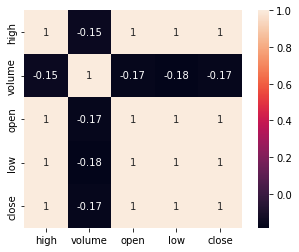




K
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  62.049999  434086.0  60.209999  60.000000   
1     2020-03-09 09:30:00  62.520000  256403.0  61.919998  61.220001   
2     2020-03-09 10:30:00  62.849998  260590.0  62.349998  62.200001   
3     2020-03-09 11:30:00  62.529999  188265.0  62.474998  61.779999   
4     2020-03-09 12:30:00  61.820000  187846.0  61.820000  60.650002   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  66.239998  465509.0  65.584999  65.510002   
3519  2022-03-07 13:30:00  66.529999  544746.0  66.180000  65.980003   
3520  2022-03-07 14:30:00  66.570000  560116.0  66.110001  66.050003   
3521  2022-03-07 15:30:00  66.169998  722067.0  66.089996  65.775002   
3522  2022-03-07 16:00:00  65.940002       0.0  65.940002  65.940002   

          close  
0     61.910000  
1     62.430000  
2     62.430000  
3     61.820000  
4     61.279999  
...         ...  
3518

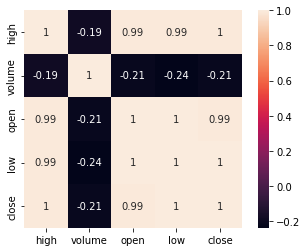




MHK
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  115.150002       0.0  112.320000  110.160004   
1     2020-03-09 09:30:00  112.235001  113862.0  110.824997  110.150002   
2     2020-03-09 10:30:00  112.790001   87118.0  110.714996  110.550003   
3     2020-03-09 11:30:00  112.150002  111364.0  111.410004  110.779999   
4     2020-03-09 12:30:00  111.709999  123863.0  111.610001  110.059998   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  128.710007  138427.0  127.684998  126.389999   
3519  2022-03-07 13:30:00  127.438103  110955.0  126.699997  125.919998   
3520  2022-03-07 14:30:00  126.419998  176563.0  126.000000  124.519997   
3521  2022-03-07 15:30:00  125.339996  350774.0  125.339996  123.129997   
3522  2022-03-07 16:00:00  123.760002       0.0  123.760002  123.760002   

           close  
0     110.834999  
1     110.949997  
2     111.809998  
3     111.605003

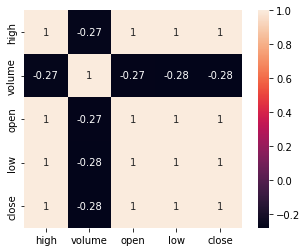




CZR
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  10.650000  7216745.0  10.200000  10.110000   
1     2020-03-09 09:30:00  10.610000  4800432.0  10.600000  10.330000   
2     2020-03-09 10:30:00  10.570000  4613321.0  10.420000  10.360000   
3     2020-03-09 11:30:00  10.530000  4359251.0  10.415000  10.355000   
4     2020-03-09 12:30:00  10.440000  3563077.0  10.440000  10.205000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  72.519997   606316.0  71.230003  70.875000   
3519  2022-03-07 13:30:00  72.605003   778177.0  71.230003  70.540001   
3520  2022-03-07 14:30:00  71.605003   773317.0  71.550003  70.269997   
3521  2022-03-07 15:30:00  70.730003   867796.0  70.720001  69.584999   
3522  2022-03-07 16:00:00  69.639999        0.0  69.639999  69.639999   

          close  
0     10.600000  
1     10.420000  
2     10.415000  
3     10.440000  
4     10.215000  
...     

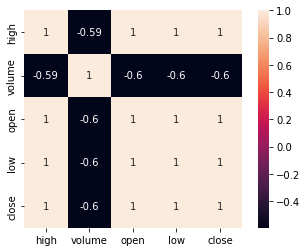




AMZN
                timestamp         high     volume         open          low  \
0     2020-03-09 08:30:00  1849.809937  2565660.0  1773.859985  1762.000000   
1     2020-03-09 09:30:00  1848.000000   980243.0  1821.569946  1815.349976   
2     2020-03-09 10:30:00  1862.770020   819939.0  1836.400024  1829.150024   
3     2020-03-09 11:30:00  1849.000000   597399.0  1846.484985  1824.119995   
4     2020-03-09 12:30:00  1839.499878   643625.0  1839.030029  1814.810059   
...                   ...          ...        ...          ...          ...   
3518  2022-03-07 12:30:00  2810.364990   473366.0  2800.300049  2764.024902   
3519  2022-03-07 13:30:00  2781.459961   394799.0  2768.840088  2760.985107   
3520  2022-03-07 14:30:00  2766.979980   500375.0  2761.995117  2752.219971   
3521  2022-03-07 15:30:00  2766.120117   552927.0  2761.860107  2748.330078   
3522  2022-03-07 16:00:00  2749.060059        0.0  2749.060059  2749.060059   

            close  
0     1821.580078  
1  

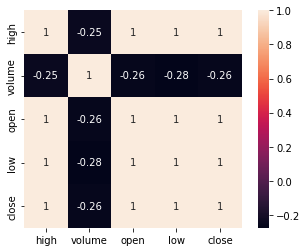




HLT
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00   87.349998   980551.0   83.400002   83.400002   
1     2020-03-09 09:30:00   87.540001   994379.0   87.050003   85.809998   
2     2020-03-09 10:30:00   87.540001  1132330.0   86.820000   85.949997   
3     2020-03-09 11:30:00   86.330002   815430.0   86.190002   85.000000   
4     2020-03-09 12:30:00   86.220001   843110.0   85.190002   85.050003   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  131.679993   364352.0  131.380005  130.089996   
3519  2022-03-07 13:30:00  130.339996   311166.0  130.160004  129.279999   
3520  2022-03-07 14:30:00  129.899994   448124.0  129.789993  128.770004   
3521  2022-03-07 15:30:00  129.934998   974598.0  129.860001  128.970001   
3522  2022-03-07 16:00:00  129.089996        0.0  129.089996  129.089996   

           close  
0      87.059998  
1      86.809998  
2      86.089996  
3   

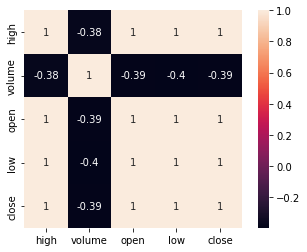




PENN
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  22.440001  1108340.0  21.309999  21.309999   
1     2020-03-09 09:30:00  21.690001   896474.0  21.620001  20.950001   
2     2020-03-09 10:30:00  21.799999   457935.0  21.360001  21.260000   
3     2020-03-09 11:30:00  21.500000   507451.0  21.400000  20.830000   
4     2020-03-09 12:30:00  20.855000   371978.0  20.855000  20.490000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  43.615002   517373.0  43.340000  42.669998   
3519  2022-03-07 13:30:00  43.299999   774603.0  42.660000  42.610001   
3520  2022-03-07 14:30:00  43.049999   872079.0  43.000000  41.709999   
3521  2022-03-07 15:30:00  41.790001  1569095.0  41.790001  40.910000   
3522  2022-03-07 16:00:00  40.910000        0.0  40.910000  40.910000   

          close  
0     21.620001  
1     21.389999  
2     21.390100  
3     20.850000  
4     20.607500  
...    

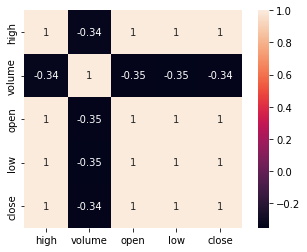




PHM
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  39.709999  714392.0  38.990002  36.860001   
1     2020-03-09 09:30:00  38.939999  766502.0  38.889999  37.830002   
2     2020-03-09 10:30:00  39.195000  528306.0  38.430000  38.174999   
3     2020-03-09 11:30:00  39.139999  630889.0  38.689999  38.450001   
4     2020-03-09 12:30:00  38.900002  553965.0  38.889999  38.430000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  46.970001  273924.0  46.860001  46.340000   
3519  2022-03-07 13:30:00  46.959999  270351.0  46.450001  46.419998   
3520  2022-03-07 14:30:00  46.869999  374123.0  46.819302  46.195000   
3521  2022-03-07 15:30:00  46.849998  642148.0  46.720001  46.230000   
3522  2022-03-07 16:00:00  46.270000       0.0  46.270000  46.270000   

          close  
0     38.910000  
1     38.439999  
2     38.700001  
3     38.904999  
4     38.610001  
...         ...  
35

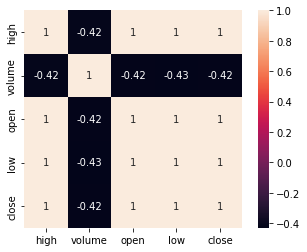




MCD
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00  194.470001  1266938.0  186.145004  185.640106   
1     2020-03-09 09:30:00  193.630005   851881.0  193.289993  188.870102   
2     2020-03-09 10:30:00  192.179993  1287705.0  191.449997  188.830002   
3     2020-03-09 11:30:00  189.199997   790758.0  188.884995  186.850006   
4     2020-03-09 12:30:00  187.220001   592849.0  187.089996  184.750000   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  227.070007   410445.0  226.729996  225.470001   
3519  2022-03-07 13:30:00  226.580002   523121.0  225.940002  225.600006   
3520  2022-03-07 14:30:00  226.240005   671777.0  225.940002  224.850006   
3521  2022-03-07 15:30:00  225.440002  1003769.0  225.440002  224.190002   
3522  2022-03-07 16:00:00  224.330002        0.0  224.330002  224.330002   

           close  
0     193.190002  
1     191.399994  
2     188.830002  
3   

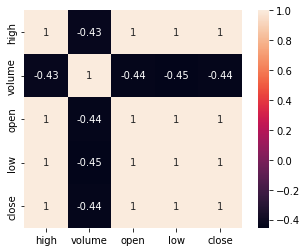




EXPE
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00   85.980003   754263.0   84.400002   82.889999   
1     2020-03-09 09:30:00   86.080002   714249.0   85.669998   84.480003   
2     2020-03-09 10:30:00   87.500000   476141.0   85.629997   85.330002   
3     2020-03-09 11:30:00   87.220001   393717.0   86.705002   86.620003   
4     2020-03-09 12:30:00   86.830002   434398.0   86.820000   85.419998   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  167.919998   991228.0  167.149994  161.630005   
3519  2022-03-07 13:30:00  162.889999   991142.0  162.179993  160.610001   
3520  2022-03-07 14:30:00  161.279999   664264.0  161.110001  157.690002   
3521  2022-03-07 15:30:00  158.279999  1210049.0  158.229996  156.139999   
3522  2022-03-07 16:00:00  157.009995        0.0  157.009995  157.009995   

           close  
0      85.639999  
1      85.650002  
2      86.660004  
3  

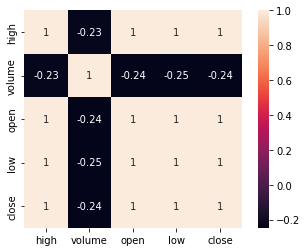




BWA
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  27.900000  775883.0  27.160000  26.799999   
1     2020-03-09 09:30:00  27.030001  558243.0  26.920000  26.605000   
2     2020-03-09 10:30:00  27.360001  380156.0  26.719999  26.660000   
3     2020-03-09 11:30:00  26.820000  411607.0  26.799999  26.350000   
4     2020-03-09 12:30:00  26.420000  461374.0  26.389999  26.110001   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  35.509998  343417.0  35.165001  35.110001   
3519  2022-03-07 13:30:00  35.419998  344119.0  35.334999  35.044899   
3520  2022-03-07 14:30:00  35.455002  532110.0  35.150002  35.110001   
3521  2022-03-07 15:30:00  35.380001  618462.0  35.369999  34.950001   
3522  2022-03-07 16:00:00  35.020000       0.0  35.020000  35.020000   

          close  
0     26.940001  
1     26.750000  
2     26.879999  
3     26.389999  
4     26.110001  
...         ...  
35

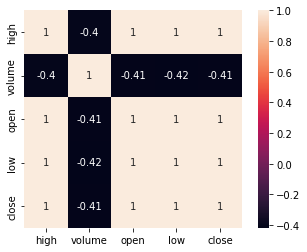




LVS
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  52.840000  1681531.0  51.009998  50.000000   
1     2020-03-09 09:30:00  52.139999   905087.0  51.869999  50.820000   
2     2020-03-09 10:30:00  52.139999   769246.0  51.450001  51.095001   
3     2020-03-09 11:30:00  51.540001   576462.0  51.459999  50.480000   
4     2020-03-09 12:30:00  50.540001   737041.0  50.540001  49.169998   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  38.090000  1337610.0  37.770000  37.549999   
3519  2022-03-07 13:30:00  37.849998  1277637.0  37.639999  37.240002   
3520  2022-03-07 14:30:00  37.255001  2172520.0  37.255001  36.509998   
3521  2022-03-07 15:30:00  36.669998  2487906.0  36.669998  35.880001   
3522  2022-03-07 16:00:00  36.099998        0.0  36.099998  36.099998   

          close  
0     51.869999  
1     51.430000  
2     51.549999  
3     50.549999  
4     49.169998  
...     

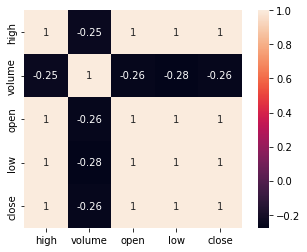




NWL
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  13.070000  965807.0  13.000000  12.590000   
1     2020-03-09 09:30:00  12.835000  769734.0  12.650000  12.500000   
2     2020-03-09 10:30:00  13.260000  831188.0  12.810000  12.770000   
3     2020-03-09 11:30:00  13.310000  885843.0  13.210000  13.190000   
4     2020-03-09 12:30:00  13.250000  933384.0  13.245000  13.210000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  22.424999  416252.0  22.150000  22.120001   
3519  2022-03-07 13:30:00  22.400000  306950.0  22.264999  22.174999   
3520  2022-03-07 14:30:00  22.270000  451361.0  22.193001  22.094999   
3521  2022-03-07 15:30:00  22.209999  536192.0  22.209999  22.040001   
3522  2022-03-07 16:00:00  22.049999       0.0  22.049999  22.049999   

          close  
0     12.640000  
1     12.810000  
2     13.220000  
3     13.245000  
4     13.245000  
...         ...  
35

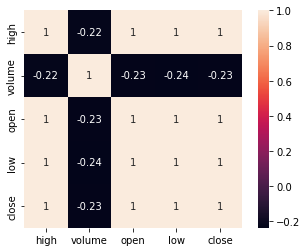




DLTR
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   79.790001  715779.0   75.440002   75.250000   
1     2020-03-09 09:30:00   81.750000  776490.0   79.449997   79.250000   
2     2020-03-09 10:30:00   83.860001  758100.0   81.580002   81.394997   
3     2020-03-09 11:30:00   84.529999  519603.0   83.639999   82.764297   
4     2020-03-09 12:30:00   84.519997  573645.0   84.415001   83.450104   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  143.360001  337119.0  143.160004  141.949997   
3519  2022-03-07 13:30:00  142.970001  393765.0  142.509995  141.800003   
3520  2022-03-07 14:30:00  142.320007  275521.0  141.889999  140.839996   
3521  2022-03-07 15:30:00  141.770004  617598.0  141.610001  140.690002   
3522  2022-03-07 16:00:00  140.860001       0.0  140.860001  140.860001   

           close  
0      79.489998  
1      81.629997  
2      83.654999  
3      84.41500

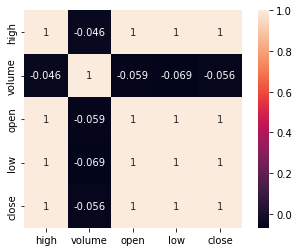




EXC
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  30.884451  2674822.0  30.884451  29.843081   
1     2020-03-09 09:30:00  30.549215  2955571.0  30.485022  29.868046   
2     2020-03-09 10:30:00  30.599144  2483321.0  29.978601  29.868046   
3     2020-03-09 11:30:00  30.435093  2435372.0  30.299572  29.743223   
4     2020-03-09 12:30:00  30.021399  2529231.0  29.921541  29.415121   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  44.250000   889278.0  44.000000  43.945000   
3519  2022-03-07 13:30:00  44.230000  1227562.0  44.169998  43.935001   
3520  2022-03-07 14:30:00  44.130001  1618634.0  43.970001  43.802502   
3521  2022-03-07 15:30:00  43.919998  2129116.0  43.830002  43.770000   
3522  2022-03-07 16:00:00  43.830002        0.0  43.830002  43.830002   

          close  
0     30.156919  
1     30.299572  
2     30.221113  
3     29.989302  
4     29.479315  
...     

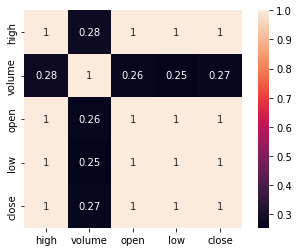




AWK
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  136.559998  331699.0  133.149994  132.649994   
1     2020-03-09 09:30:00  136.939804  302708.0  135.470001  133.850006   
2     2020-03-09 10:30:00  138.949997  280543.0  136.929993  136.279999   
3     2020-03-09 11:30:00  138.330002  181564.0  137.970001  136.449997   
4     2020-03-09 12:30:00  136.979996  216409.0  136.830002  134.179993   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  160.070007  101529.0  159.389999  158.869995   
3519  2022-03-07 13:30:00  160.119995  118555.0  159.835007  159.059998   
3520  2022-03-07 14:30:00  159.369995  138679.0  159.229996  158.104996   
3521  2022-03-07 15:30:00  159.539993  275501.0  158.639999  158.539993   
3522  2022-03-07 16:00:00  159.220001       0.0  159.220001  159.220001   

           close  
0     135.339996  
1     136.811996  
2     138.029999  
3     136.910004

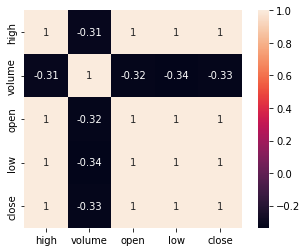




AES
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  15.800000        0.0  15.650000  15.350000   
1     2020-03-09 09:30:00  15.630000  1097677.0  15.550000  15.270000   
2     2020-03-09 10:30:00  15.620000   516762.0  15.530000  15.281400   
3     2020-03-09 11:30:00  15.330000   600007.0  15.310000  15.060000   
4     2020-03-09 12:30:00  15.070000   712191.0  15.070000  14.640000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  21.990000   615517.0  21.809999  21.719999   
3519  2022-03-07 13:30:00  22.065001  1249333.0  21.955000  21.924999   
3520  2022-03-07 14:30:00  22.035000  1249816.0  21.975000  21.805000   
3521  2022-03-07 15:30:00  22.000000  1341853.0  21.940001  21.860001   
3522  2022-03-07 16:00:00  21.870001        0.0  21.870001  21.870001   

          close  
0     15.530000  
1     15.530000  
2     15.300000  
3     15.070000  
4     14.655000  
...     

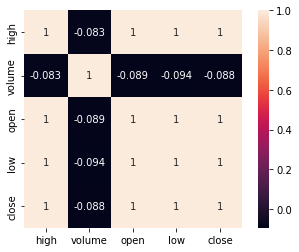




DUK
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   95.430000  747253.0   94.500000   93.500000   
1     2020-03-09 09:30:00   95.849998  703773.0   94.989998   93.940002   
2     2020-03-09 10:30:00   96.690002  407272.0   95.650002   95.290001   
3     2020-03-09 11:30:00   95.839996  388331.0   95.680000   94.610001   
4     2020-03-09 12:30:00   94.660004  512280.0   94.580002   92.860001   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  106.790901  341137.0  106.099998  105.830002   
3519  2022-03-07 13:30:00  106.989998  278262.0  106.750000  106.400002   
3520  2022-03-07 14:30:00  106.839996  340692.0  106.559998  106.250000   
3521  2022-03-07 15:30:00  106.860001  700930.0  106.269997  106.220001   
3522  2022-03-07 16:00:00  106.699997       0.0  106.699997  106.699997   

           close  
0      94.980003  
1      95.669998  
2      95.690002  
3      94.639999

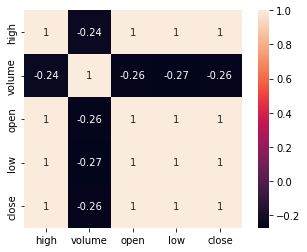




NI
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  28.490000        0.0  28.020000  27.760000   
1     2020-03-09 09:30:00  28.150000  1045030.0  28.080000  27.570000   
2     2020-03-09 10:30:00  28.020000   943122.0  27.840000  27.540001   
3     2020-03-09 11:30:00  27.799999   475556.0  27.760000  27.510000   
4     2020-03-09 12:30:00  27.540001   512261.0  27.525000  26.910000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  30.200001   349090.0  30.100000  29.980000   
3519  2022-03-07 13:30:00  30.270000   361585.0  30.190001  30.059999   
3520  2022-03-07 14:30:00  30.200001   387613.0  30.090000  30.059999   
3521  2022-03-07 15:30:00  30.200001   756557.0  30.070000  30.045000   
3522  2022-03-07 16:00:00  30.110001        0.0  30.110001  30.110001   

          close  
0     28.090000  
1     27.850000  
2     27.799999  
3     27.530001  
4     26.910000  
...      

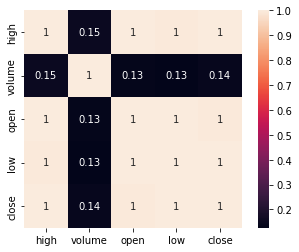




NRG
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  31.870001  695840.0  31.530001  30.910000   
1     2020-03-09 09:30:00  31.580000  885125.0  31.360001  30.610001   
2     2020-03-09 10:30:00  31.320000  344692.0  31.209999  30.665001   
3     2020-03-09 11:30:00  30.709999  400084.0  30.690001  30.129999   
4     2020-03-09 12:30:00  30.260000  476418.0  30.260000  29.555000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  38.505001  301098.0  38.310001  38.040001   
3519  2022-03-07 13:30:00  38.514999  367718.0  38.320000  37.970001   
3520  2022-03-07 14:30:00  38.029999  336834.0  38.020000  37.720001   
3521  2022-03-07 15:30:00  38.090000  523776.0  37.820000  37.799999   
3522  2022-03-07 16:00:00  38.009998       0.0  38.009998  38.009998   

          close  
0     31.365000  
1     31.230000  
2     30.719999  
3     30.260000  
4     29.555000  
...         ...  
35

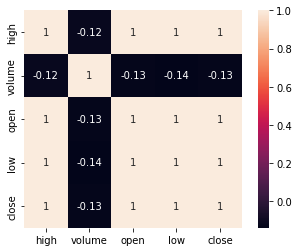




CB
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  142.000000       0.0  135.649994  134.429993   
1     2020-03-09 09:30:00  138.149994  421677.0  137.320007  135.500000   
2     2020-03-09 10:30:00  139.360001  350728.0  137.850006  136.630005   
3     2020-03-09 11:30:00  136.710007  254633.0  136.669998  134.860001   
4     2020-03-09 12:30:00  135.080002  238739.0  135.080002  132.339996   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  201.240005  207570.0  200.710007  199.419998   
3519  2022-03-07 13:30:00  200.994995  168247.0  200.059998  200.000000   
3520  2022-03-07 14:30:00  200.509995  206928.0  200.199997  199.240005   
3521  2022-03-07 15:30:00  199.869598  399272.0  199.809998  198.779999   
3522  2022-03-07 16:00:00  198.919998       0.0  198.919998  198.919998   

           close  
0     137.309998  
1     137.929993  
2     136.949997  
3     135.080002 

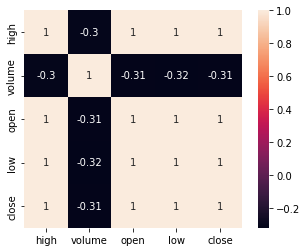




AXP
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00  101.410004  2066656.0  100.870003   98.519997   
1     2020-03-09 09:30:00  101.047997  1436756.0  100.699997   98.949997   
2     2020-03-09 10:30:00  101.440002  2083184.0  100.480003  100.099998   
3     2020-03-09 11:30:00  100.459999  1881335.0  100.309998   99.355003   
4     2020-03-09 12:30:00   99.690002  1192994.0   99.690002   97.559998   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  163.350006   743947.0  161.880005  161.360001   
3519  2022-03-07 13:30:00  162.529999   688675.0  162.404999  161.059998   
3520  2022-03-07 14:30:00  161.339996   831405.0  161.229996  159.880005   
3521  2022-03-07 15:30:00  160.229996  1235059.0  160.229996  159.080002   
3522  2022-03-07 16:00:00  159.130005        0.0  159.130005  159.130005   

           close  
0     100.720001  
1     100.504997  
2     100.430000  
3   

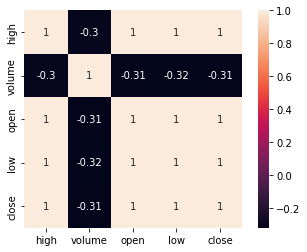




PGR
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00   77.480003  1116278.0   75.419998   75.099998   
1     2020-03-09 09:30:00   77.480003  1856565.0   76.220001   75.111000   
2     2020-03-09 10:30:00   76.800003  1271045.0   75.332901   75.111000   
3     2020-03-09 11:30:00   76.269997  1368775.0   76.260002   74.639999   
4     2020-03-09 12:30:00   75.800003  1468505.0   74.699997   73.639999   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  108.154999   420035.0  107.849998  107.449997   
3519  2022-03-07 13:30:00  108.260002   269972.0  107.665001  107.360001   
3520  2022-03-07 14:30:00  107.445000   342258.0  107.400002  106.589996   
3521  2022-03-07 15:30:00  107.010002   586763.0  106.610001  106.400002   
3522  2022-03-07 16:00:00  106.519997        0.0  106.519997  106.519997   

           close  
0      76.189903  
1      76.199997  
2      75.580002  
3   

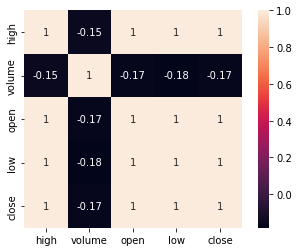




WFC
                timestamp       high      volume       open        low  \
0     2020-03-09 08:30:00  34.474998  10340341.0  33.720001  33.000000   
1     2020-03-09 09:30:00  34.220001   6146049.0  34.005001  33.380001   
2     2020-03-09 10:30:00  33.860001   6287100.0  33.695000  33.369999   
3     2020-03-09 11:30:00  33.570000   6339511.0  33.514999  33.029999   
4     2020-03-09 12:30:00  33.064999   5386884.0  33.064999  32.520000   
...                   ...        ...         ...        ...        ...   
3518  2022-03-07 12:30:00  46.509998   7169357.0  46.330002  45.794998   
3519  2022-03-07 13:30:00  46.660000   6691957.0  45.799999  45.794998   
3520  2022-03-07 14:30:00  46.900002  11181049.0  46.625000  45.910000   
3521  2022-03-07 15:30:00  46.299999   8477414.0  46.250000  45.770000   
3522  2022-03-07 16:00:00  45.810001         0.0  45.810001  45.810001   

          close  
0     34.005001  
1     33.699902  
2     33.570000  
3     33.060001  
4     32.52000

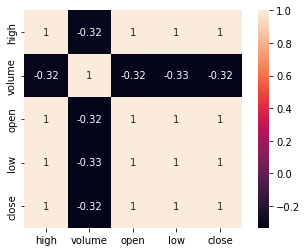




L
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  41.939999  163453.0  41.250000  40.660000   
1     2020-03-09 09:30:00  41.230000  181229.0  41.040001  40.400002   
2     2020-03-09 10:30:00  41.340000  184500.0  40.919998  40.330002   
3     2020-03-09 11:30:00  40.410000  200254.0  40.380001  39.900002   
4     2020-03-09 12:30:00  39.950001  269564.0  39.950001  38.939999   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  60.099998  103865.0  59.950001  59.790001   
3519  2022-03-07 13:30:00  60.200001   68332.0  60.129002  59.959999   
3520  2022-03-07 14:30:00  60.230000  111631.0  60.029999  59.930000   
3521  2022-03-07 15:30:00  60.060001  260695.0  60.060001  59.669998   
3522  2022-03-07 16:00:00  59.680000       0.0  59.680000  59.680000   

          close  
0     41.070000  
1     40.919998  
2     40.389999  
3     39.970001  
4     39.070000  
...         ...  
3518

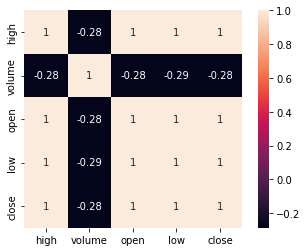




SCHW
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  31.870001  4311015.0  30.860001  30.240000   
1     2020-03-09 09:30:00  31.129999  3985358.0  30.809999  30.549999   
2     2020-03-09 10:30:00  31.049999  3255561.0  30.610001  30.500000   
3     2020-03-09 11:30:00  30.959999  2812657.0  30.725000  30.340000   
4     2020-03-09 12:30:00  30.995001  2959047.0  30.709999  30.260000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  78.050003   755333.0  77.430000  77.150002   
3519  2022-03-07 13:30:00  77.709999   695042.0  77.599998  77.010002   
3520  2022-03-07 14:30:00  77.540001   825587.0  77.430000  76.680000   
3521  2022-03-07 15:30:00  76.894997  1581858.0  76.820000  76.230003   
3522  2022-03-07 16:00:00  76.360001        0.0  76.360001  76.360001   

          close  
0     30.820000  
1     30.615000  
2     30.650000  
3     30.709999  
4     30.277300  
...    

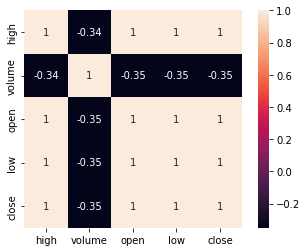




SPGI
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  258.779999  471548.0  249.839996  248.585007   
1     2020-03-09 09:30:00  256.959991  438888.0  254.979996  251.309998   
2     2020-03-09 10:30:00  257.954987  296074.0  253.669998  252.750000   
3     2020-03-09 11:30:00  253.720001  437520.0  253.289993  249.000000   
4     2020-03-09 12:30:00  250.919998  705956.0  250.830002  246.029999   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  394.223694  269590.0  392.239990  390.934998   
3519  2022-03-07 13:30:00  394.049988  302452.0  393.040009  386.850006   
3520  2022-03-07 14:30:00  387.850006  381193.0  387.750000  384.674988   
3521  2022-03-07 15:30:00  389.179993  754492.0  385.924988  385.154999   
3522  2022-03-07 16:00:00  385.640015       0.0  385.640015  385.640015   

           close  
0     255.145004  
1     254.125000  
2     253.324997  
3     250.91000

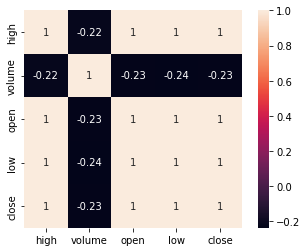




GS
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00  179.250000  1199858.0  173.580002  172.018799   
1     2020-03-09 09:30:00  177.179993   960424.0  176.639999  174.100006   
2     2020-03-09 10:30:00  177.860001   600898.0  176.600006  176.020004   
3     2020-03-09 11:30:00  176.089996   613678.0  176.009995  172.630005   
4     2020-03-09 12:30:00  172.899902   641276.0  172.899902  170.250000   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  327.130005   356739.0  324.179993  323.660004   
3519  2022-03-07 13:30:00  326.670013   404212.0  326.010010  322.260010   
3520  2022-03-07 14:30:00  323.674988   366234.0  323.010010  321.380005   
3521  2022-03-07 15:30:00  323.059998   576796.0  323.059998  321.299988   
3522  2022-03-07 16:00:00  321.890015        0.0  321.890015  321.890015   

           close  
0     176.639999  
1     176.580002  
2     176.035004  
3    

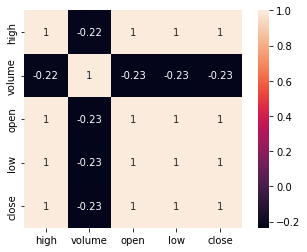




AMP
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  118.394997       0.0  114.160004  112.000000   
1     2020-03-09 09:30:00  116.660004  229949.0  116.205002  113.709999   
2     2020-03-09 10:30:00  115.300003  148718.0  114.190002  113.400002   
3     2020-03-09 11:30:00  113.489998  177569.0  113.400002  111.198997   
4     2020-03-09 12:30:00  111.324997  140216.0  111.324997  108.680000   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  270.524994   92037.0  268.589996  267.859985   
3519  2022-03-07 13:30:00  269.440002   82213.0  268.649994  267.410004   
3520  2022-03-07 14:30:00  268.019989  106830.0  267.500000  265.799988   
3521  2022-03-07 15:30:00  267.470001  204130.0  266.799988  264.690002   
3522  2022-03-07 16:00:00  264.920013       0.0  264.920013  264.920013   

           close  
0     116.199997  
1     114.379997  
2     113.459999  
3     111.349998

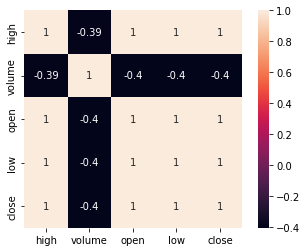




AON
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  198.449997  733836.0  198.389999  186.259995   
1     2020-03-09 09:30:00  186.580002  844528.0  186.559998  182.380005   
2     2020-03-09 10:30:00  183.160004  689354.0  182.770004  178.830002   
3     2020-03-09 11:30:00  181.210007  776006.0  179.910004  179.500000   
4     2020-03-09 12:30:00  180.789993  579169.0  180.789993  175.800095   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  290.279999  231514.0  289.420013  288.916504   
3519  2022-03-07 13:30:00  290.760010  153210.0  289.859985  289.480011   
3520  2022-03-07 14:30:00  290.000000  410660.0  289.350006  288.220001   
3521  2022-03-07 15:30:00  290.285004  466897.0  289.609985  288.230011   
3522  2022-03-07 16:00:00  288.380005       0.0  288.380005  288.380005   

           close  
0     186.440002  
1     182.899994  
2     180.330002  
3     180.710007

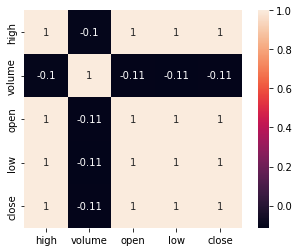




WRB
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  62.709999       0.0  62.709999  60.520000   
1     2020-03-09 09:30:00  62.310001  174757.0  62.139999  61.125000   
2     2020-03-09 10:30:00  62.169998   98640.0  61.740002  61.110001   
3     2020-03-09 11:30:00  61.200001  120502.0  61.110001  60.680000   
4     2020-03-09 12:30:00  60.869999  149469.0  60.840000  59.599998   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  88.860001   32723.0  88.750000  88.309998   
3519  2022-03-07 13:30:00  89.120003   63793.0  88.800003  88.537498   
3520  2022-03-07 14:30:00  89.410004  109759.0  89.059998  88.830002   
3521  2022-03-07 15:30:00  89.360001  213342.0  89.300003  88.855003   
3522  2022-03-07 16:00:00  88.900002       0.0  88.900002  88.900002   

          close  
0     62.075001  
1     61.799999  
2     61.160000  
3     60.919998  
4     59.680000  
...         ...  
35

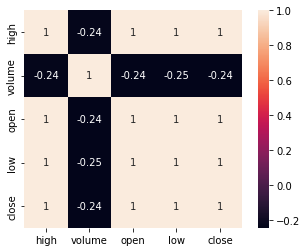




SIVB
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  160.330002       0.0  153.729996  148.339996   
1     2020-03-09 09:30:00  158.350006  221960.0  157.899994  153.682098   
2     2020-03-09 10:30:00  154.289993  177863.0  154.289993  149.200104   
3     2020-03-09 11:30:00  149.289993  129157.0  149.039993  146.869995   
4     2020-03-09 12:30:00  148.350006  172106.0  147.089996  144.809998   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  517.010010  108408.0  514.799988  507.329987   
3519  2022-03-07 13:30:00  510.747406   96130.0  509.459991  503.279999   
3520  2022-03-07 14:30:00  506.769989  142103.0  505.019989  494.500000   
3521  2022-03-07 15:30:00  498.929993  208410.0  497.964996  492.820007   
3522  2022-03-07 16:00:00  494.350006       0.0  494.350006  494.350006   

           close  
0     158.000000  
1     154.460007  
2     149.490005  
3     147.08000

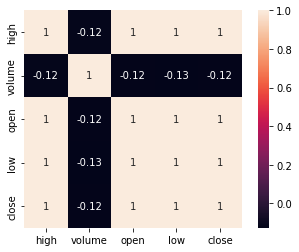




ALL
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  100.029999  290092.0   99.570000   96.019997   
1     2020-03-09 09:30:00   99.595001  316942.0   99.120003   97.209999   
2     2020-03-09 10:30:00  100.160004  202575.0   98.910004   97.639999   
3     2020-03-09 11:30:00   97.860001  196849.0   97.669998   96.389999   
4     2020-03-09 12:30:00   96.494102  248573.0   96.494102   94.690002   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  127.110001  196402.0  127.040001  126.010002   
3519  2022-03-07 13:30:00  126.849998  162993.0  126.070000  126.040001   
3520  2022-03-07 14:30:00  126.544998  284099.0  126.519997  125.495003   
3521  2022-03-07 15:30:00  125.839996  481543.0  125.639999  125.089996   
3522  2022-03-07 16:00:00  125.169998       0.0  125.169998  125.169998   

           close  
0      98.940002  
1      99.070000  
2      97.675003  
3      96.459999

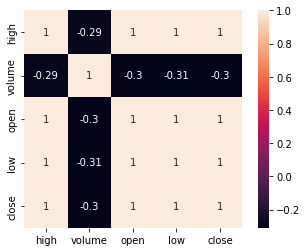




BLK
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  436.100006  330388.0  411.390015  405.149994   
1     2020-03-09 09:30:00  426.989990  232020.0  424.575012  414.015015   
2     2020-03-09 10:30:00  431.850006  149772.0  426.130005  424.470001   
3     2020-03-09 11:30:00  426.350006  119146.0  425.500000  420.000000   
4     2020-03-09 12:30:00  420.010010  120453.0  420.010010  415.140015   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  683.789978   82337.0  680.549988  679.309998   
3519  2022-03-07 13:30:00  682.260010   87650.0  680.289978  676.280029   
3520  2022-03-07 14:30:00  679.960022  150168.0  677.962097  674.840027   
3521  2022-03-07 15:30:00  680.765015  231315.0  678.489990  676.580017   
3522  2022-03-07 16:00:00  677.070007       0.0  677.070007  677.070007   

           close  
0     424.720001  
1     426.295013  
2     426.059998  
3     420.390015

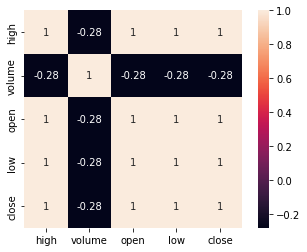




LYB
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  68.000000  693669.0  65.000000  62.669998   
1     2020-03-09 09:30:00  64.970001  813281.0  64.886002  61.750000   
2     2020-03-09 10:30:00  63.630001  523559.0  62.250000  62.110001   
3     2020-03-09 11:30:00  62.962502  354134.0  62.962502  61.759998   
4     2020-03-09 12:30:00  62.080002  429114.0  61.990002  60.580002   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  95.639999  241947.0  94.750000  94.709999   
3519  2022-03-07 13:30:00  95.650002  198031.0  95.220001  94.900002   
3520  2022-03-07 14:30:00  95.540001  271985.0  94.980003  94.891403   
3521  2022-03-07 15:30:00  95.250000  467362.0  95.250000  94.660004   
3522  2022-03-07 16:00:00  94.779999       0.0  94.779999  94.779999   

          close  
0     64.879997  
1     62.314098  
2     63.084999  
3     62.029999  
4     60.580002  
...         ...  
35

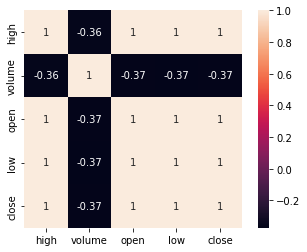




BLL
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  74.220001  639563.0  72.029999  69.989998   
1     2020-03-09 09:30:00  73.595001  288733.0  73.510002  72.000000   
2     2020-03-09 10:30:00  74.519997  277241.0  73.059998  72.845001   
3     2020-03-09 11:30:00  74.190002  207464.0  74.050003  73.129997   
4     2020-03-09 12:30:00  73.519997  257748.0  73.510002  71.919998   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  92.570000  209449.0  92.010002  91.694000   
3519  2022-03-07 13:30:00  91.980003  224118.0  91.900002  90.430000   
3520  2022-03-07 14:30:00  90.540001  296871.0  90.419998  90.084000   
3521  2022-03-07 15:30:00  90.190002  402650.0  90.129997  89.440002   
3522  2022-03-07 16:00:00  89.690002       0.0  89.690002  89.690002   

          close  
0     73.540001  
1     73.110001  
2     74.000000  
3     73.529999  
4     72.309998  
...         ...  
35

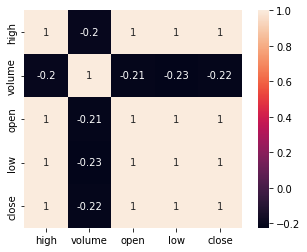




APD
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  214.990005       0.0  214.990005  205.789993   
1     2020-03-09 09:30:00  213.279999  260741.0  212.149994  210.190002   
2     2020-03-09 10:30:00  214.259995  195407.0  211.410004  211.000000   
3     2020-03-09 11:30:00  212.029999  252512.0  211.699997  209.077499   
4     2020-03-09 12:30:00  209.365005  278100.0  209.365005  205.179993   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  224.550003  185085.0  223.625000  222.979996   
3519  2022-03-07 13:30:00  224.604996  142896.0  224.259995  222.600006   
3520  2022-03-07 14:30:00  223.070007  176574.0  222.820007  221.699997   
3521  2022-03-07 15:30:00  222.320007  420161.0  222.309998  221.000000   
3522  2022-03-07 16:00:00  221.500000       0.0  221.500000  221.500000   

           close  
0     212.210007  
1     211.490005  
2     211.274994  
3     209.380005

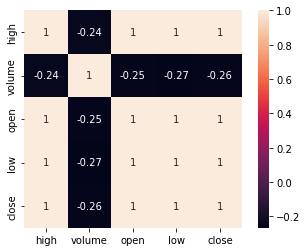




FMC
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   84.927498  113379.0   84.500000   81.000000   
1     2020-03-09 09:30:00   84.570000  124455.0   84.570000   83.120003   
2     2020-03-09 10:30:00   85.430000   95681.0   84.239998   83.878998   
3     2020-03-09 11:30:00   84.459999  124405.0   84.285004   82.845001   
4     2020-03-09 12:30:00   83.050003  138488.0   83.050003   80.690002   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  121.580002  149602.0  121.580002  119.260002   
3519  2022-03-07 13:30:00  119.419998  133333.0  119.364998  118.199997   
3520  2022-03-07 14:30:00  119.430000   98659.0  118.180000  117.980003   
3521  2022-03-07 15:30:00  119.430000  152254.0  119.199997  118.900002   
3522  2022-03-07 16:00:00  118.910004       0.0  118.910004  118.910004   

           close  
0      84.400002  
1      84.339996  
2      84.339996  
3      83.000000

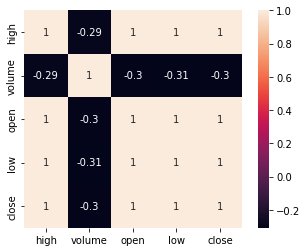




NEM
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  50.500000  2178505.0  50.000000  49.189999   
1     2020-03-09 09:30:00  49.930000  1835123.0  49.340000  49.099998   
2     2020-03-09 10:30:00  50.580002  1095095.0  49.470001  49.330002   
3     2020-03-09 11:30:00  50.040001  1006675.0  50.020000  49.080002   
4     2020-03-09 12:30:00  49.279999  1032072.0  49.200001  48.349998   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  77.073700  1294666.0  75.570000  75.389999   
3519  2022-03-07 13:30:00  77.665001  1787591.0  77.047897  76.940002   
3520  2022-03-07 14:30:00  78.070000  1624063.0  77.279999  76.995003   
3521  2022-03-07 15:30:00  77.889999  2196384.0  77.610001  77.510002   
3522  2022-03-07 16:00:00  77.849998        0.0  77.849998  77.849998   

          close  
0     49.325001  
1     49.490002  
2     50.000000  
3     49.230000  
4     48.529999  
...     

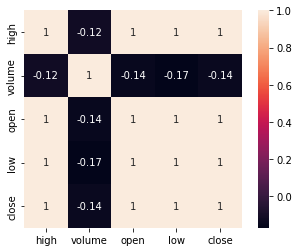




NUE
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00   37.599998  435461.0   36.810001   36.619999   
1     2020-03-09 09:30:00   36.820000  494858.0   36.720100   35.759998   
2     2020-03-09 10:30:00   36.759998  707334.0   35.980000   35.919998   
3     2020-03-09 11:30:00   35.889999  373960.0   35.840000   35.450001   
4     2020-03-09 12:30:00   35.509998  354945.0   35.490002   34.935001   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  133.789993  471058.0  132.880005  131.429993   
3519  2022-03-07 13:30:00  132.470001  319471.0  132.259995  131.169998   
3520  2022-03-07 14:30:00  131.970001  318417.0  131.559998  130.250000   
3521  2022-03-07 15:30:00  132.410004  538588.0  131.429993  131.259995   
3522  2022-03-07 16:00:00  131.899994       0.0  131.899994  131.899994   

           close  
0      36.730000  
1      35.970100  
2      35.980000  
3      35.529999

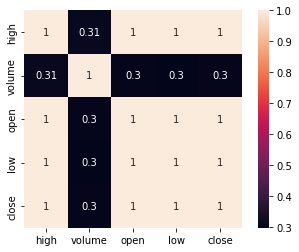




MAA
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  138.899994       0.0  136.979996  134.029999   
1     2020-03-09 09:30:00  138.389999  125320.0  138.255005  135.360001   
2     2020-03-09 10:30:00  138.630005   95882.0  137.630005  136.554993   
3     2020-03-09 11:30:00  137.949997  120341.0  137.850006  135.889999   
4     2020-03-09 12:30:00  136.979996  117085.0  136.149994  134.809998   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  213.190002   54436.0  213.009995  211.789993   
3519  2022-03-07 13:30:00  214.009995   54588.0  212.869995  212.259995   
3520  2022-03-07 14:30:00  212.755005   76903.0  212.389999  211.479996   
3521  2022-03-07 15:30:00  212.500000  159940.0  212.279999  211.770004   
3522  2022-03-07 16:00:00  212.050003       0.0  212.050003  212.050003   

           close  
0     138.179993  
1     137.679993  
2     137.929993  
3     136.199997

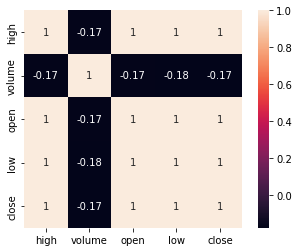




CBRE
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  51.189999       0.0  50.130001  49.759998   
1     2020-03-09 09:30:00  51.070000  284856.0  50.799999  50.060001   
2     2020-03-09 10:30:00  51.619999  334331.0  50.910000  50.660000   
3     2020-03-09 11:30:00  50.849998  207648.0  50.820000  50.215000   
4     2020-03-09 12:30:00  50.349998  261050.0  50.330002  49.410000   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  88.610001  230250.0  88.059998  87.504997   
3519  2022-03-07 13:30:00  88.349998  205775.0  87.860001  87.339996   
3520  2022-03-07 14:30:00  87.550003  407226.0  87.519997  86.760002   
3521  2022-03-07 15:30:00  87.139999  572654.0  87.139999  86.287003   
3522  2022-03-07 16:00:00  86.459999       0.0  86.459999  86.459999   

          close  
0     50.810001  
1     50.910000  
2     50.880001  
3     50.320000  
4     49.410000  
...         ...  
3

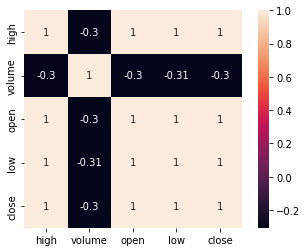




ARE
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  153.360001       0.0  153.360001  148.619995   
1     2020-03-09 09:30:00  154.410004  127974.0  152.399994  150.940002   
2     2020-03-09 10:30:00  154.320007   85075.0  153.294998  152.570007   
3     2020-03-09 11:30:00  153.350006   70413.0  153.080002  151.669998   
4     2020-03-09 12:30:00  151.914993   86639.0  151.914993  148.490005   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  191.339996   87911.0  190.600006  189.960007   
3519  2022-03-07 13:30:00  192.205002   71604.0  191.369995  191.000000   
3520  2022-03-07 14:30:00  191.824997  104842.0  191.449997  190.309998   
3521  2022-03-07 15:30:00  190.970001  206015.0  190.600006  189.429993   
3522  2022-03-07 16:00:00  189.440002       0.0  189.440002  189.440002   

           close  
0     152.809998  
1     153.205002  
2     153.009995  
3     152.005005

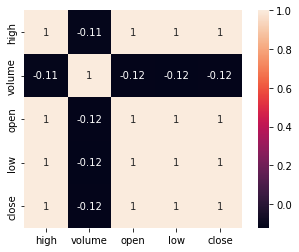




FRT
                timestamp        high    volume        open         low  \
0     2020-03-09 08:30:00  116.379997       0.0  114.500000  114.292503   
1     2020-03-09 09:30:00  116.260002   90381.0  116.110001  114.739998   
2     2020-03-09 10:30:00  116.360001   75273.0  115.809998  115.059998   
3     2020-03-09 11:30:00  116.190002  117405.0  115.900002  115.370003   
4     2020-03-09 12:30:00  115.400002   77449.0  115.400002  113.519997   
...                   ...         ...       ...         ...         ...   
3518  2022-03-07 12:30:00  118.199997   31980.0  118.000000  117.574997   
3519  2022-03-07 13:30:00  118.095001   22054.0  117.809998  117.250000   
3520  2022-03-07 14:30:00  117.519997   51188.0  117.360001  116.660004   
3521  2022-03-07 15:30:00  117.065002  132080.0  116.989899  115.879997   
3522  2022-03-07 16:00:00  116.110001       0.0  116.110001  116.110001   

           close  
0     115.889999  
1     115.910004  
2     115.900002  
3     115.500000

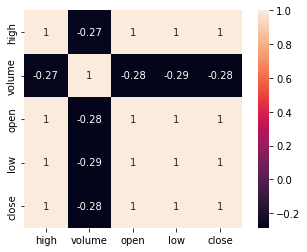




O
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  71.705429  377878.0  69.089149  68.798447   
1     2020-03-09 09:30:00  72.291664  548280.0  71.618217  71.027130   
2     2020-03-09 10:30:00  72.625969  310434.0  72.102715  71.773254   
3     2020-03-09 11:30:00  72.296509  290338.0  72.267441  71.773254   
4     2020-03-09 12:30:00  72.102715  448374.0  72.102715  70.799416   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  65.459999  390017.0  65.339996  65.125702   
3519  2022-03-07 13:30:00  65.480003  419974.0  65.260002  65.089996   
3520  2022-03-07 14:30:00  65.320000  633221.0  65.084999  64.855003   
3521  2022-03-07 15:30:00  65.110001  888463.0  65.059998  64.660004   
3522  2022-03-07 16:00:00  64.669998       0.0  64.669998  64.669998   

          close  
0     71.472870  
1     72.267441  
2     72.344963  
3     72.117249  
4     71.172478  
...         ...  
3518

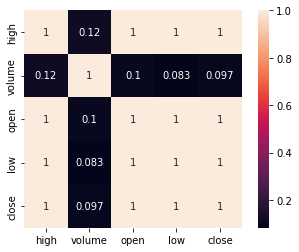




REG
                timestamp       high    volume       open        low  \
0     2020-03-09 08:30:00  57.900002       0.0  57.180000  56.619999   
1     2020-03-09 09:30:00  57.782501  110646.0  57.680000  57.000000   
2     2020-03-09 10:30:00  57.820000  155436.0  57.480000  57.139999   
3     2020-03-09 11:30:00  57.580002  140928.0  57.340000  57.009998   
4     2020-03-09 12:30:00  57.250000  111975.0  57.209999  55.939999   
...                   ...        ...       ...        ...        ...   
3518  2022-03-07 12:30:00  67.050003   73394.0  66.820000  66.580002   
3519  2022-03-07 13:30:00  66.900002   84406.0  66.709999  66.410004   
3520  2022-03-07 14:30:00  66.589996   83450.0  66.510002  66.110001   
3521  2022-03-07 15:30:00  66.559998  258488.0  66.529999  65.930000   
3522  2022-03-07 16:00:00  65.949997       0.0  65.949997  65.949997   

          close  
0     57.660000  
1     57.570000  
2     57.389999  
3     57.290001  
4     55.939999  
...         ...  
35

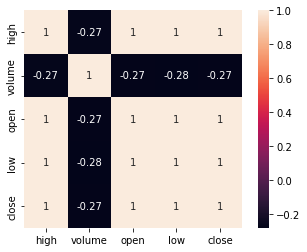




PXD
                timestamp        high     volume        open         low  \
0     2020-03-09 08:30:00   73.000000  1746652.0   72.860001   64.529999   
1     2020-03-09 09:30:00   74.959999  1272040.0   73.680000   68.000000   
2     2020-03-09 10:30:00   70.669998   762197.0   69.239998   69.089996   
3     2020-03-09 11:30:00   71.779999   782541.0   70.120003   68.449997   
4     2020-03-09 12:30:00   70.309998   549159.0   68.449997   68.000000   
...                   ...         ...        ...         ...         ...   
3518  2022-03-07 12:30:00  237.665604   349916.0  236.550003  234.735001   
3519  2022-03-07 13:30:00  237.570007   408076.0  237.134995  233.860001   
3520  2022-03-07 14:30:00  235.690002   387241.0  234.529999  233.929993   
3521  2022-03-07 15:30:00  237.309998   555632.0  234.630005  234.524994   
3522  2022-03-07 16:00:00  236.630005        0.0  236.630005  236.630005   

           close  
0      69.879997  
1      69.220001  
2      69.922501  
3   

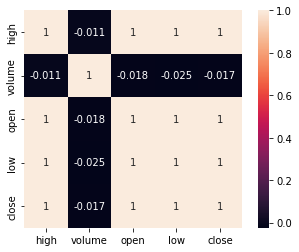




CTRA
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00   4.170000        0.0   4.170000   3.935000   
1     2020-03-09 09:30:00   4.150000     9458.0   4.115000   3.970000   
2     2020-03-09 10:30:00   4.010000     6815.0   4.010000   3.950000   
3     2020-03-09 11:30:00   3.955000     3389.0   3.951500   3.950000   
4     2020-03-09 12:30:00   3.960000     7631.0   3.950000   3.950000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  26.700001  1392402.0  26.370001  26.209999   
3519  2022-03-07 13:30:00  26.730000  1520137.0  26.650000  26.270000   
3520  2022-03-07 14:30:00  26.969999  1448933.0  26.520000  26.459999   
3521  2022-03-07 15:30:00  27.080000  1624477.0  26.785000  26.761900   
3522  2022-03-07 16:00:00  27.000000        0.0  27.000000  27.000000   

          close  
0      4.150000  
1      4.000000  
2      3.950000  
3      3.950000  
4      3.950000  
...    

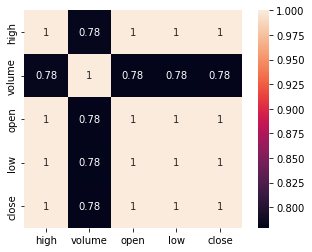




APA
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  13.230000  2965900.0  13.210000  11.550000   
1     2020-03-09 09:30:00  12.440000  3743852.0  12.130100  11.660000   
2     2020-03-09 10:30:00  12.050000  2256227.0  11.960000  11.350000   
3     2020-03-09 11:30:00  11.500000  2688413.0  11.400000  10.290000   
4     2020-03-09 12:30:00  10.540000  2862999.0  10.405000  10.110000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  38.320000  2226972.0  37.660000  37.330002   
3519  2022-03-07 13:30:00  38.380001  1408113.0  38.230000  37.459999   
3520  2022-03-07 14:30:00  38.125000  1526044.0  37.680000  37.419998   
3521  2022-03-07 15:30:00  38.049999  1779962.0  37.799999  36.669998   
3522  2022-03-07 16:00:00  37.919998        0.0  37.919998  37.919998   

          close  
0     12.140000  
1     11.950000  
2     11.370000  
3     10.405000  
4     10.325900  
...     

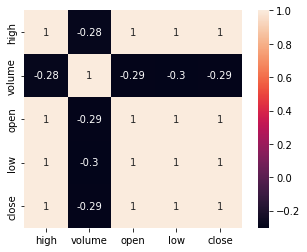




MRO
                timestamp       high      volume       open        low  \
0     2020-03-09 08:30:00   5.000000  13522343.0   4.210000   3.800000   
1     2020-03-09 09:30:00   4.750000  15485476.0   4.750000   3.950000   
2     2020-03-09 10:30:00   4.130000  12089013.0   4.090000   3.910000   
3     2020-03-09 11:30:00   3.919900  11164910.0   3.915000   3.750000   
4     2020-03-09 12:30:00   3.769900  17358201.0   3.769900   3.320000   
...                   ...        ...         ...        ...        ...   
3518  2022-03-07 12:30:00  24.299999   3053962.0  23.650000  23.552700   
3519  2022-03-07 13:30:00  24.260000   2335100.0  24.209900  23.980000   
3520  2022-03-07 14:30:00  24.260000   2368889.0  24.108601  23.971500   
3521  2022-03-07 15:30:00  24.410000   3426423.0  24.094999  24.075001   
3522  2022-03-07 16:00:00  24.330000         0.0  24.330000  24.330000   

          close  
0      4.730000  
1      4.095000  
2      3.910000  
3      3.760000  
4      3.36150

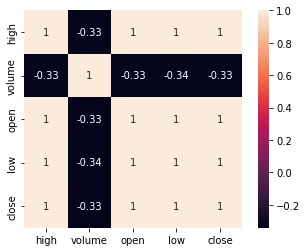




WMB
                timestamp       high     volume       open        low  \
0     2020-03-09 08:30:00  15.440000  6433964.0  14.680000  13.170000   
1     2020-03-09 09:30:00  15.010000  4254211.0  14.710000  14.410000   
2     2020-03-09 10:30:00  15.330000  4749855.0  14.920000  14.870000   
3     2020-03-09 11:30:00  15.350000  4517591.0  15.285000  15.035000   
4     2020-03-09 12:30:00  15.300000  5603881.0  15.265000  15.180000   
...                   ...        ...        ...        ...        ...   
3518  2022-03-07 12:30:00  33.389999   839644.0  33.060001  32.980000   
3519  2022-03-07 13:30:00  33.369999   987012.0  33.347099  33.110901   
3520  2022-03-07 14:30:00  33.430000  1408921.0  33.244999  33.215000   
3521  2022-03-07 15:30:00  33.459999  1722749.0  33.310001  33.290001   
3522  2022-03-07 16:00:00  33.400002        0.0  33.400002  33.400002   

          close  
0     14.710000  
1     14.919900  
2     15.260000  
3     15.270000  
4     15.180000  
...     

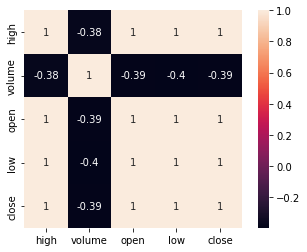

In [178]:
for symbol in constituent_symbols:
    print(symbol)
    print(dfs[symbol])
    print()
    print("--- Shape ---")
    print("Number of records:", dfs[symbol].shape[0])
    print("Number of attributes:", dfs[symbol].shape[1])
    print()
    print("--- Types ---")
    print(dfs[symbol].dtypes)
    print()
    print("--- Missing values in each attribute ---")
    print(dfs[symbol].isnull().sum())
    print()
    print("--- Statistical measures for each attribute ---")
    print(dfs[symbol].describe())
    print()
    print("--- Correlation ---")
    sns.heatmap(dfs[symbol].corr(), square=True, annot=True)
    plt.show()
    print()
    print()
    print()

## Data preprocessing

In [179]:
for symbol in constituent_symbols:
    dfs[symbol] = dfs[symbol].dropna()

## Creation of trading signals and additional features

### Trading signals

In [180]:
for symbol in constituent_symbols:
    # SMA
    num_periods_sma = 20
    dfs[symbol]['SMA'] = SMA(num_periods_sma, dfs[symbol]['close'])
    
    # EMA
    num_periods_ema = 20
    dfs[symbol]['EMA'] = EMA(num_periods_ema, dfs[symbol]['close'])

    # APO
    num_periods_fast = 10
    num_periods_slow = 40
    dfs[symbol]['APO'] = APO(num_periods_fast, num_periods_slow, dfs[symbol]['close'])

### History of previous records

In [ ]:
num_prev_recs = 5
for symbol in constituent_symbols:
    prev_close = [[None for _ in range(num_prev_recs)] for _ in range(num_prev_recs)]
    prev_SMA = [[None for _ in range(num_prev_recs)] for _ in range(num_prev_recs)]
    prev_EMA = [[None for _ in range(num_prev_recs)] for _ in range(num_prev_recs)]
    prev_APO = [[None for _ in range(num_prev_recs)] for _ in range(num_prev_recs)]
    for i in range(num_prev_recs, dfs[symbol].shape[0]):
        for j in range(num_prev_recs):
            prev_close[j].append(dfs[symbol].iloc[i - (j + 1)]['close'])
            prev_SMA[j].append(dfs[symbol].iloc[i - (j + 1)]['SMA'])
            prev_EMA[j].append(dfs[symbol].iloc[i - (j + 1)]['EMA'])
            prev_APO[j].append(dfs[symbol].iloc[i - (j + 1)]['APO'])
    for i in range(num_prev_recs):
        dfs[symbol]["prev_close" + str(i)] = prev_close[i]
        dfs[symbol]["prev_SMA" + str(i)] = prev_SMA[i]
        dfs[symbol]["prev_EMA" + str(i)] = prev_EMA[i]
        dfs[symbol]["prev_APO" + str(i)] = prev_APO[i]
    dfs[symbol] = dfs[symbol].dropna() # Remove records that have null values